<a id='toc'/>

# Table of content

1. [Loading packages](#loading-packages)
2. [Loading Data](#2-loading-data)
3. [EDA (Technical analysis)](#eda_technical)
4. [EDA (Information analysis)](#eda_information)
5. [Train Test Split](#train_test_split)
6. [Dummy Model](#dummy-model)
7. [Preprocessing Pipeline](#pipeline)
8. [Evaluation](#evaluation)
9. [Cross Validation](#cross_validation)
10. [Grid Search](#grid_search)
11. [EDA for Yes case](#eda_yes)

*** [Comparison](#comparison)

<a id='loading_packages'/>

# 1. Loading packages
[TOC](#toc)

In [85]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

# Matrix
# from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, RocCurveDisplay, classification_report
# from sklearn.impute import SimpleImputer, KNNImputer

# Pipeline
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

import warnings
warnings.filterwarnings('ignore')

RSEED = 42

<a id='loading_data'/>

# 2. Loading data
[TOC](#toc)

In [3]:
df = pd.read_csv('data/Train.csv')

In [4]:
df.head().T

0                     1   
country                                   Kenya                 Kenya  \
year                                       2018                  2018   
uniqueid                             uniqueid_1            uniqueid_2   
bank_account                                Yes                    No   
location_type                             Rural                 Rural   
cellphone_access                            Yes                    No   
household_size                                3                     5   
age_of_respondent                            24                    70   
gender_of_respondent                     Female                Female   
relationship_with_head                   Spouse     Head of Household   
marital_status          Married/Living together               Widowed   
education_level             Secondary education   No formal education   
job_type                          Self employed  Government Dependent   

                                                      2   
country                                           Kenya  \
year                                               2018   
uniqueid                                     uniqueid_3   
bank_account                                        Yes   
location_type                                     Urban   
cellphone_access                                    Yes   
household_size                                        5   
age_of_respondent                                    26   
gender_of_respondent                               Male   
relationship_with_head                   Other relative   
marital_status                     Single/Never Married   
education_level         Vocational/Specialised training   
job_type                                  Self employed   

                                                3                     4  
country                                     Kenya                 Kenya  
year                                         2018                  2018  
uniqueid                               uniqueid_4            uniqueid_5  
bank_account                                   No                    No  
location_type                               Rural                 Urban  
cellphone_access                              Yes                    No  
household_size                                  5                     8  
age_of_respondent                              34                    26  
gender_of_respondent                       Female                  Male  
relationship_with_head          Head of Household                 Child  
marital_status            Married/Living together  Single/Never Married  
education_level                 Primary education     Primary education  
job_type                Formally employed Private   Informally employed

In [5]:
# rename some columns
df.rename(columns={'cellphone_access': 'cellphone', 
                  'age_of_respondent': 'age', 
                  'gender_of_respondent': 'gender', 
                  }, inplace=True)

In [6]:
definition = pd.read_csv('data/VariableDefinitions.csv')
definition

Variable Definitions                                         Unnamed: 1
0                  country                         Country interviewee is in.
1                     year                           Year survey was done in.
2                 uniqueid             Unique identifier for each interviewee
3            location_type                     Type of location: Rural, Urban
4         cellphone_access  If interviewee has access to a cellphone: Yes, No
5           household_size               Number of people living in one house
6        age_of_respondent                         The age of the interviewee
7     gender_of_respondent                Gender of interviewee: Male, Female
8   relationship_with_head  The interviewee’s relationship with the head o...
9           marital_status  The martial status of the interviewee: Married...
10         education_level  Highest level of education: No formal educatio...
11                job_type  Type of job interviewee has: Farming and Fishi...

<a id='eda_technical'/>

# 3. EDA (technical analysis)
[TOC](#toc)

In [7]:
#shape of our datasets.
print('df data shape :', df.shape)

df data shape : (23524, 13)


In [8]:
#Check missing value
df.isnull().sum().to_frame()

0
country                 0
year                    0
uniqueid                0
bank_account            0
location_type           0
cellphone               0
household_size          0
age                     0
gender                  0
relationship_with_head  0
marital_status          0
education_level         0
job_type                0

In [9]:
df.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone                    2
household_size              20
age                         85
gender                       2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone               23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age                     23524 non-null  int64 
 8   gender                  23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [13]:
df.describe(include='all').T

count unique                      top   freq   
country                   23524      4                   Rwanda   8735  \
year                    23524.0    NaN                      NaN    NaN   
uniqueid                  23524   8735               uniqueid_1      4   
bank_account              23524      2                       No  20212   
location_type             23524      2                    Rural  14343   
cellphone                 23524      2                      Yes  17454   
household_size          23524.0    NaN                      NaN    NaN   
age                     23524.0    NaN                      NaN    NaN   
gender                    23524      2                   Female  13877   
relationship_with_head    23524      6        Head of Household  12831   
marital_status            23524      5  Married/Living together  10749   
education_level           23524      6        Primary education  12791   
job_type                  23524     10            Self employed   6437   

                               mean        std     min     25%     50%   
country                         NaN        NaN     NaN     NaN     NaN  \
year                    2016.975939   0.847371  2016.0  2016.0  2017.0   
uniqueid                        NaN        NaN     NaN     NaN     NaN   
bank_account                    NaN        NaN     NaN     NaN     NaN   
location_type                   NaN        NaN     NaN     NaN     NaN   
cellphone                       NaN        NaN     NaN     NaN     NaN   
household_size             3.797483   2.227613     1.0     2.0     3.0   
age                        38.80522  16.520569    16.0    26.0    35.0   
gender                          NaN        NaN     NaN     NaN     NaN   
relationship_with_head          NaN        NaN     NaN     NaN     NaN   
marital_status                  NaN        NaN     NaN     NaN     NaN   
education_level                 NaN        NaN     NaN     NaN     NaN   
job_type                        NaN        NaN     NaN     NaN     NaN   

                           75%     max  
country                    NaN     NaN  
year                    2018.0  2018.0  
uniqueid                   NaN     NaN  
bank_account               NaN     NaN  
location_type              NaN     NaN  
cellphone                  NaN     NaN  
household_size             5.0    21.0  
age                       49.0   100.0  
gender                     NaN     NaN  
relationship_with_head     NaN     NaN  
marital_status             NaN     NaN  
education_level            NaN     NaN  
job_type                   NaN     NaN

### Insights technical analysis
- Row:23524 
- Columns:13
- There is no missing values and duplicates
- only 3 features (year, household_size, age) out of 13 are numeric

[TOC](#toc)

<a id='eda_information'/>

# 4. EDA (Information analysis)
[TOC](#toc)

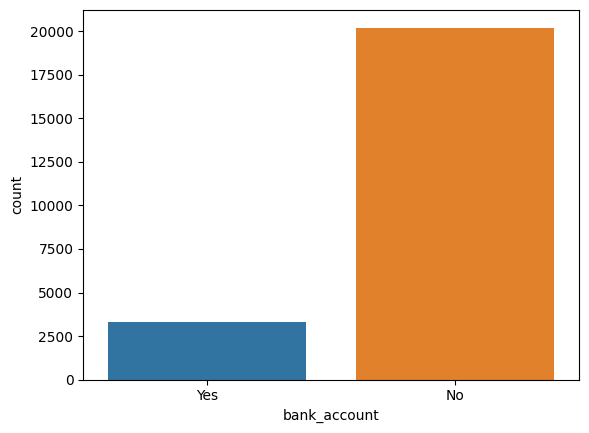

In [14]:
# Check the target variables
sns.countplot(x='bank_account', data=df)
plt.show()

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'household_size'}>],
       [<Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

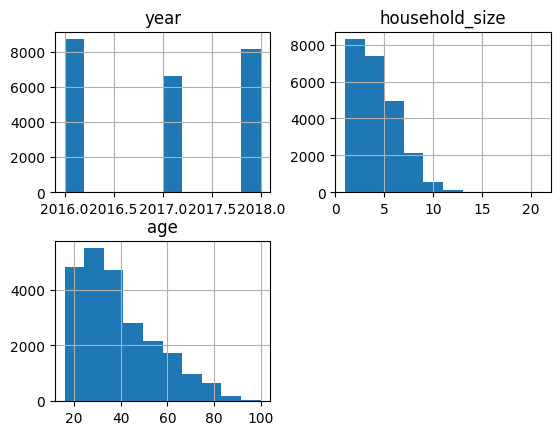

In [15]:
df.hist()

In [16]:
df['household_size'].value_counts().sort_index()

household_size
1     3057
2     5229
3     3920
4     3474
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
14      10
15      11
16       4
17       1
18       1
20       1
21       1
Name: count, dtype: int64

In [17]:
df['relationship_with_head'].value_counts().sort_index()

relationship_with_head
Child                   2229
Head of Household      12831
Other non-relatives      190
Other relative           668
Parent                  1086
Spouse                  6520
Name: count, dtype: int64

In [18]:
df['marital_status'].value_counts().sort_index()

marital_status
Divorced/Seperated          2076
Dont know                      8
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Name: count, dtype: int64

In [19]:
df['education_level'].value_counts().sort_index()

education_level
No formal education                 4515
Other/Dont know/RTA                   35
Primary education                  12791
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Name: count, dtype: int64

In [20]:
df['job_type'].value_counts().sort_index()

job_type
Dont Know/Refuse to answer       126
Farming and Fishing             5441
Formally employed Government     387
Formally employed Private       1055
Government Dependent             247
Informally employed             5597
No Income                        627
Other Income                    1080
Remittance Dependent            2527
Self employed                   6437
Name: count, dtype: int64

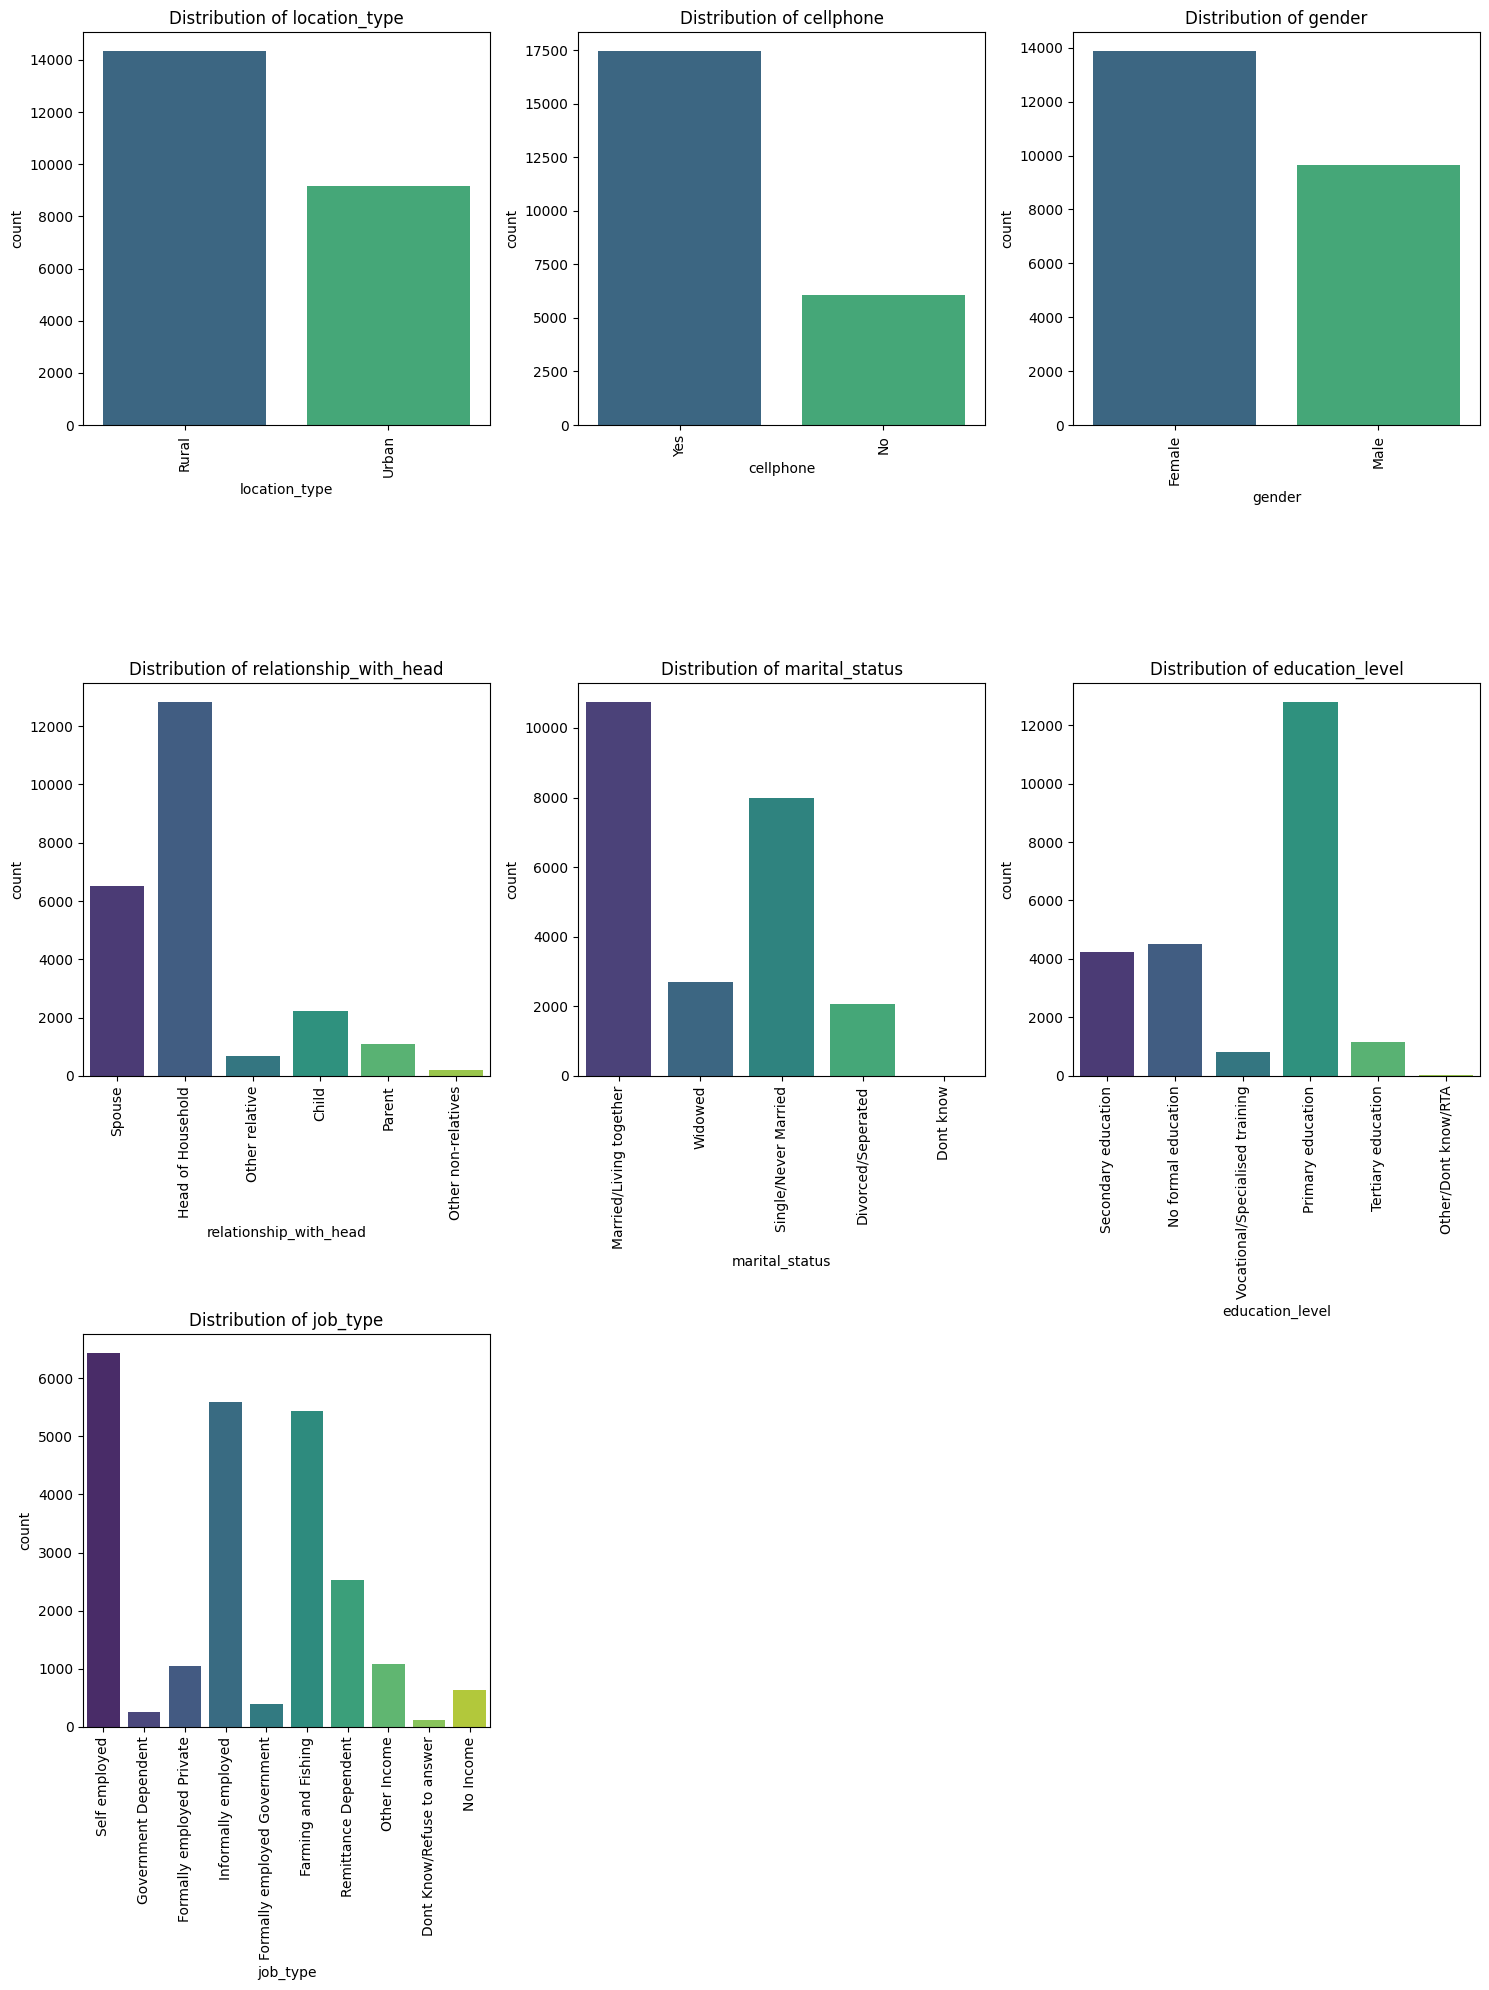

In [21]:
# Selecting categorical variables
categorical_vars = ['location_type', 'cellphone', 'gender', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']

# Setting the chart size
plt.figure(figsize=(15, 20))

# Loop over categorical variables to create subplots
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, data=df, palette='viridis')
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=90)

# Adjusting the layout
plt.tight_layout()
plt.show()

plt.show()

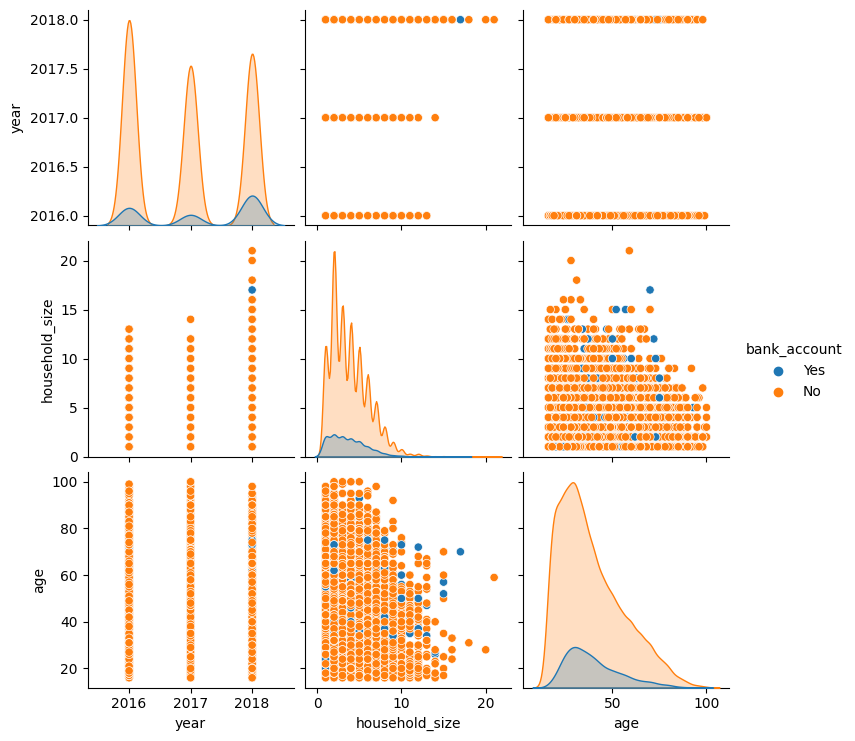

In [22]:
sns.pairplot(df_bak, hue='bank_account')  

### Check Correlation
[TOC](#toc)

In [29]:
df_bak = df.copy()
df_bak.drop('uniqueid', inplace=True, axis=1) 
df_bak.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone',
       'household_size', 'age', 'gender', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')

In [30]:
le = LabelEncoder()
variables_to_encode = ['country', 'year', 'bank_account', 'location_type', 'cellphone', 'gender', 'relationship_with_head', 'marital_status',  'education_level', 'job_type']
for variable in variables_to_encode:
    df_bak[variable] = le.fit_transform(df_bak[variable])

df_bak.head()

country  year  bank_account  location_type  cellphone  household_size  age   
0        0     2             1              0          1               3   24  \
1        0     2             0              0          0               5   70   
2        0     2             1              1          1               5   26   
3        0     2             0              0          1               5   34   
4        0     2             0              1          0               8   26   

   gender  relationship_with_head  marital_status  education_level  job_type  
0       0                       5               2                3         9  
1       0                       1               4                0         4  
2       1                       3               3                5         9  
3       0                       1               2                2         3  
4       1                       0               3                2         5

In [31]:
df_bak.corr().round(2)

country  year  bank_account  location_type  cellphone   
country                    1.00 -0.09         -0.16           0.15      -0.15  \
year                      -0.09  1.00          0.11           0.21      -0.07   
bank_account              -0.16  0.11          1.00           0.09       0.21   
location_type              0.15  0.21          0.09           1.00      -0.09   
cellphone                 -0.15 -0.07          0.21          -0.09       1.00   
household_size            -0.12 -0.05         -0.03          -0.26       0.09   
age                       -0.06 -0.02          0.02          -0.05      -0.10   
gender                    -0.03  0.00          0.12           0.01       0.10   
relationship_with_head     0.13  0.00         -0.07           0.02      -0.05   
marital_status             0.01 -0.03         -0.04           0.08      -0.09   
education_level           -0.05  0.17          0.32           0.13       0.25   
job_type                   0.38  0.27         -0.06           0.37      -0.15   

                        household_size   age  gender  relationship_with_head   
country                          -0.12 -0.06   -0.03                    0.13  \
year                             -0.05 -0.02    0.00                    0.00   
bank_account                     -0.03  0.02    0.12                   -0.07   
location_type                    -0.26 -0.05    0.01                    0.02   
cellphone                         0.09 -0.10    0.10                   -0.05   
household_size                    1.00 -0.13    0.01                    0.10   
age                              -0.13  1.00    0.01                   -0.15   
gender                            0.01  0.01    1.00                   -0.47   
relationship_with_head            0.10 -0.15   -0.47                    1.00   
marital_status                   -0.13  0.22   -0.10                   -0.14   
education_level                   0.00 -0.35    0.12                   -0.02   
job_type                         -0.16 -0.10   -0.03                    0.04   

                        marital_status  education_level  job_type  
country                           0.01            -0.05      0.38  
year                             -0.03             0.17      0.27  
bank_account                     -0.04             0.32     -0.06  
location_type                     0.08             0.13      0.37  
cellphone                        -0.09             0.25     -0.15  
household_size                   -0.13             0.00     -0.16  
age                               0.22            -0.35     -0.10  
gender                           -0.10             0.12     -0.03  
relationship_with_head           -0.14            -0.02      0.04  
marital_status                    1.00            -0.12      0.06  
education_level                  -0.12             1.00      0.04  
job_type                          0.06             0.04      1.00

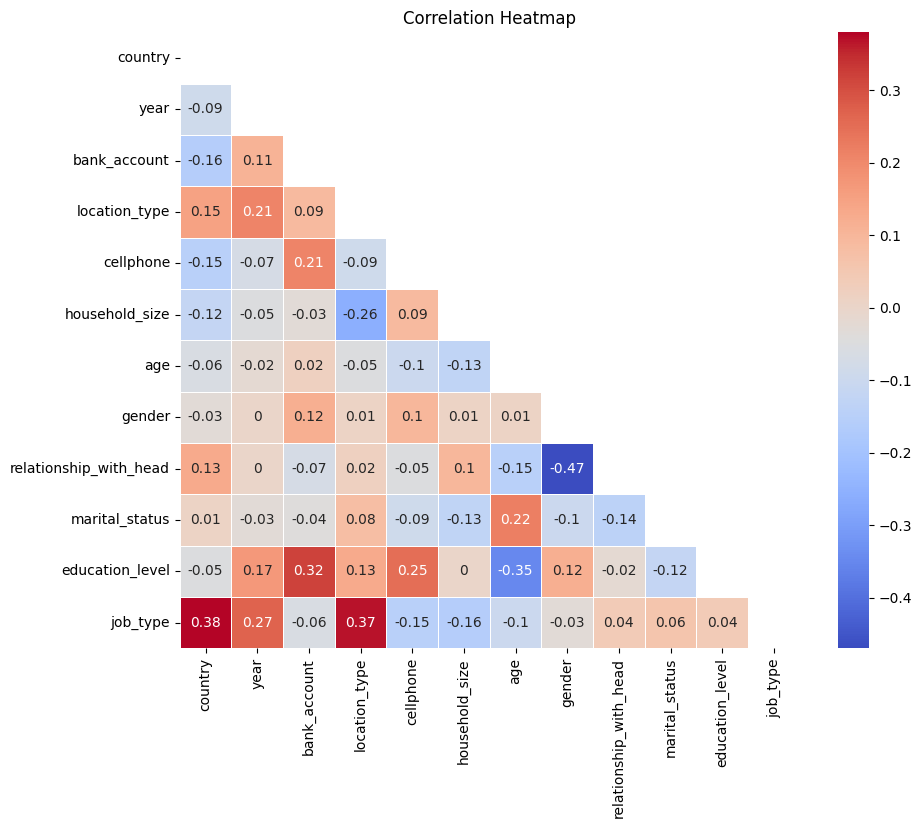

In [34]:
# Create a correlation matrix between the selected columns
correlation_matrix = df_bak.corr().round(2)

# Create a mask to hide the upper triangular portion of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the heatmap size
plt.figure(figsize=(10, 8))

# Create the heatmap with colors
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, mask=mask)

plt.title('Correlation Heatmap')
plt.show()


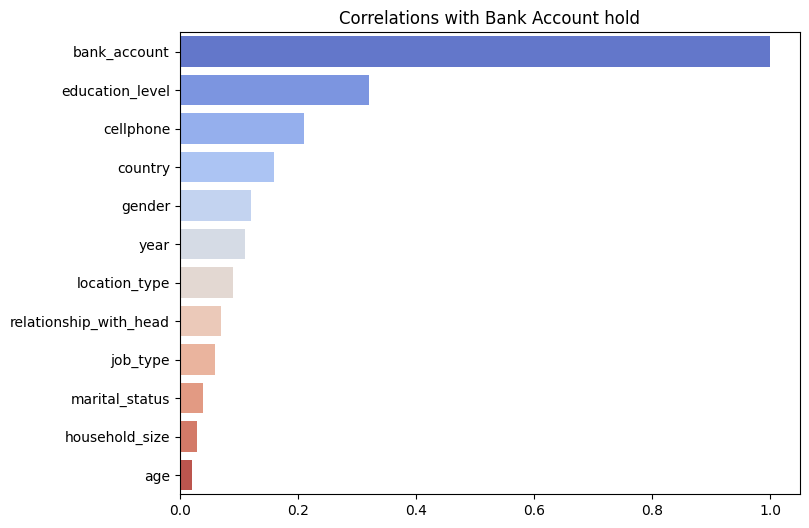

In [46]:
target_correlations = correlation_matrix['bank_account']
sorted_target_correlations = target_correlations.abs().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_target_correlations.values, y=sorted_target_correlations.index, palette='coolwarm')
plt.title('Correlations with Bank Account hold')
plt.show()

### Findings
* Almost 85% don't have a bank account (Target data is imbalanced)
* Most of the respondents are from the rural area (+- 60%)
* 74% have cellphone, but probably not a smartphone
* A bit more than 50% are head of household. Suspect that there are many people that live alone
* 86% of peolple don't have bank account
* Low level educatiom. 70% with no education or just primary education

Correlations with 'bank_account'
- Higher: 'education_level', 'cellphone', 'country', 'gender',
- Lower: 'location_type', 'household_size', 'age', relationship_with_head', 'marital_status', 'job_type'

[TOC](#toc)

# Preprocessing Pipeline
  Drop **uniqueid**, **marital_status** and **household_size** since they don't seem to have high correlations. \
  *Keep **age** and **job_type** for experiment
  
[TOC](#toc)

In [47]:
#Dropping the unnecessary columns
data = df.copy()
data.drop(['uniqueid', 'household_size', 'marital_status'], axis=1, inplace=True)
data.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone', 'age',
       'gender', 'relationship_with_head', 'education_level', 'job_type'],
      dtype='object')

#### Separate features in two list: categorical and numerical variables

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   bank_account            23524 non-null  object
 3   location_type           23524 non-null  object
 4   cellphone               23524 non-null  object
 5   age                     23524 non-null  int64 
 6   gender                  23524 non-null  object
 7   relationship_with_head  23524 non-null  object
 8   education_level         23524 non-null  object
 9   job_type                23524 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.8+ MB


In [49]:
# categorical mask
cat_mask = data.dtypes == 'object'
cat_mask

country                    True
year                      False
bank_account               True
location_type              True
cellphone                  True
age                       False
gender                     True
relationship_with_head     True
education_level            True
job_type                   True
dtype: bool

In [50]:
data.columns[cat_mask].tolist()

['country',
 'bank_account',
 'location_type',
 'cellphone',
 'gender',
 'relationship_with_head',
 'education_level',
 'job_type']

In [51]:
## Creating list for categorical predictors/features 
# Remove 'bank_account' as it's the target variable
cat_features = data.columns[cat_mask].tolist()
cat_features.remove('bank_account')
cat_features

['country',
 'location_type',
 'cellphone',
 'gender',
 'relationship_with_head',
 'education_level',
 'job_type']

In [52]:
#numeric mask
num_mask = data.dtypes != 'object'
num_mask

country                   False
year                       True
bank_account              False
location_type             False
cellphone                 False
age                        True
gender                    False
relationship_with_head    False
education_level           False
job_type                  False
dtype: bool

In [53]:
num_features = data.columns[num_mask].tolist()
num_features

['year', 'age']

In [54]:
data.loc[:, num_mask]

year  age
0      2018   24
1      2018   70
2      2018   26
3      2018   34
4      2018   26
...     ...  ...
23519  2018   48
23520  2018   27
23521  2018   27
23522  2018   30
23523  2018   20

[23524 rows x 2 columns]

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   bank_account            23524 non-null  object
 3   location_type           23524 non-null  object
 4   cellphone               23524 non-null  object
 5   age                     23524 non-null  int64 
 6   gender                  23524 non-null  object
 7   relationship_with_head  23524 non-null  object
 8   education_level         23524 non-null  object
 9   job_type                23524 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.8+ MB


<a id='train_test_split'/>

# 5. Train Test Split
[TOC](#toc)

In [57]:
# Define predictors X (features) and target variable y
X = data.drop('bank_account', axis=1)
y = data['bank_account']

print(f"We have {X.shape[0]} observations in the dataset and {X.shape[1]} features")
print(f"Our target has also {y.shape[0]} values")

We have 23524 observations in the dataset and 9 features
Our target has also 23524 values


In [61]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RSEED)

In [67]:
X_train_percentage = (X_train.shape[0]/(X_train.shape[0] + X_test.shape[0])) * 100
X_test_percentage = (X_test.shape[0]/(X_train.shape[0] + X_test.shape[0])) * 100

print('X_train shape:', X_train.shape, f"{X_train_percentage: .0f}%")
print('X_test shape:', X_test.shape, "{:.0f}%".format(X_test_percentage))
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (16466, 9)  70%
X_test shape: (7058, 9) 30%
y_train shape: (16466,)
y_test shape: (7058,)


<a id='dummy_model'/>

## Dummy model as a baseline model
[TOC](#toc)


In [68]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [69]:
dummy.score(X_train, y_train)

0.8592250698408842

In [70]:
dummy.score(X_test,y_test)

0.8591669028053273

In [71]:
dummy.predict(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

<a id='pipeline'/>

# Preprocessing Pipeline
**Categorical**
  * country: OHE(one-hot-encode)
  * location_type: OHE
  * cellphone: OHE
  * gender: OHE
  * relationship_with_head: OHE
  * education_level: OHE
  * job_type: OHE

**Numerical**
  * year: KBinDiscretizer(automatically OHE)
  * age: KBinDiscretizer

**Resampling**
  * Oversampling: SMOTE

[TOC](#toc)

In [72]:
data.nunique()

country                    4
year                       3
bank_account               2
location_type              2
cellphone                  2
age                       85
gender                     2
relationship_with_head     6
education_level            6
job_type                  10
dtype: int64

In [73]:
# Pipeline for numerical features
# Initiating Pipeline and calling one step after another
# each step is built as a list of (name, transform)
# name is the name of the processing step
# transform is an transformation/estimator object (processing step)
num_pipeline = Pipeline([("num_scaler", StandardScaler())])
num_pipeline

Pipeline(steps=[('num_scaler', StandardScaler())])

In [74]:
# Pipeline for categorical features 
cat_pipeline = Pipeline([("ohe", OneHotEncoder())])
cat_pipeline

Pipeline(steps=[('ohe', OneHotEncoder())])

In [75]:
# Complete pipeline for numerical and categorical features
# 'ColumnTransformer' applies transformers (num_pipeline/cat_pipeline)
# to specific columns of an array or DataFrame (num_features/cat_features)
preprocessor = ColumnTransformer([
    ("num_processor", num_pipeline, num_features),
    ("cat_processor", cat_pipeline, cat_features)
])
preprocessor

ColumnTransformer(transformers=[('num_processor',
                                 Pipeline(steps=[('num_scaler',
                                                  StandardScaler())]),
                                 ['year', 'age']),
                                ('cat_processor',
                                 Pipeline(steps=[('ohe', OneHotEncoder())]),
                                 ['country', 'location_type', 'cellphone',
                                  'gender', 'relationship_with_head',
                                  'education_level', 'job_type'])])

## Logistic Regression

In [87]:
pipeline_model_lg = imbpipeline([('ct', preprocessor),
                                 ('smote', SMOTE(random_state=42)),
                                 ('model', LogisticRegression()),])

In [88]:
pipeline_model_lg.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('num_scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'age']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['country', 'location_type',
                                                   'cellphone', 'gender',
                                                   'relationship_with_head',
                                                   'education_level',
                                                   'job_type'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression())])

## Random Forest

In [93]:
pipeline_model_rf = imbpipeline([('ct', preprocessor),
                                 ('smote', SMOTE(random_state=42)), # may not be necessary
                                 ('model', RandomForestClassifier()),])

In [94]:
pipeline_model_rf.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('num_scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'age']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['country', 'location_type',
                                                   'cellphone', 'gender',
                                                   'relationship_with_head',
                                                   'education_level',
                                                   'job_type'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', RandomForestClassifier())])

<a id='evaluation'/>

## KNN

In [95]:
pipeline_model_knn = imbpipeline([('ct', preprocessor),
                                  ('smote', SMOTE(random_state=42)),
                                  ('model', KNeighborsClassifier()),])

In [96]:
pipeline_model_knn.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('num_scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'age']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['country', 'location_type',
                                                   'cellphone', 'gender',
                                                   'relationship_with_head',
                                                   'education_level',
                                                   'job_type'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', KNeighborsClassifier())])

# Evaluation
[TOC](#toc)

In [97]:
#Logistic Regression
y_pred_lg = pipeline_model_lg.predict(X_test)
# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_lg))
print("Recall:", recall_score(y_test, y_pred_lg, pos_label='Yes'))
print("precision", precision_score(y_test, y_pred_lg, pos_label='Yes'))
print("-----"*10)

Accuracy: 0.7904505525644658
Recall: 0.7515090543259557
precision 0.3774633653360283
--------------------------------------------------


In [98]:
#Random Forest
y_pred_fr = pipeline_model_rf.predict(X_test)
# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_fr))
print("Recall:", recall_score(y_test, y_pred_fr, pos_label='Yes'))
print("precision", precision_score(y_test, y_pred_fr, pos_label='Yes'))
print("-----"*10)

Accuracy: 0.8309719467271182
Recall: 0.4959758551307847
precision 0.4160337552742616
--------------------------------------------------


In [99]:
#KNN
y_pred_knn = pipeline_model_knn.predict(X_test)
# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn, pos_label='Yes'))
print("precision", precision_score(y_test, y_pred_knn, pos_label='Yes'))
print("-----"*10)

Accuracy: 0.7969679795976197
Recall: 0.6378269617706237
precision 0.37141183362624486
--------------------------------------------------


Confusiton Matrix for Dummy model

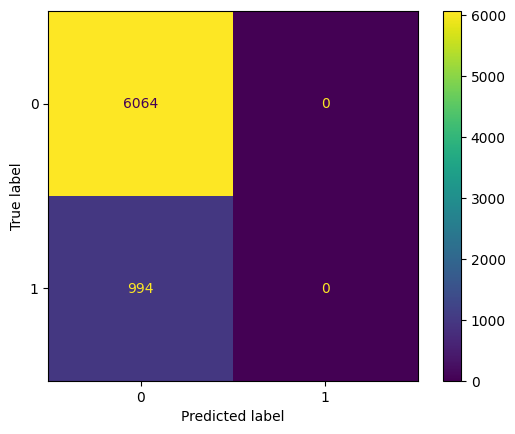

In [100]:
confusion_matrix_dummy = ConfusionMatrixDisplay(confusion_matrix(y_test, dummy.predict(X_test)))
confusion_matrix_dummy.plot();

Confusion Matrix for Logistic regression model

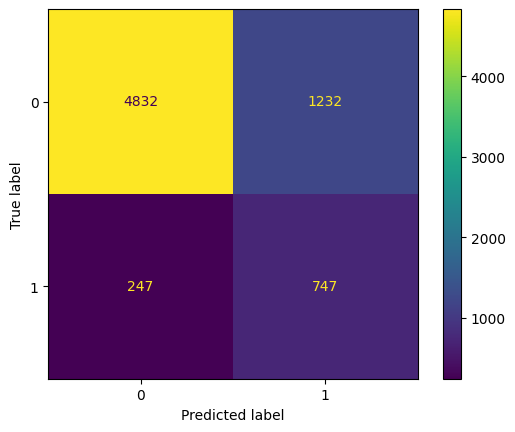

In [101]:
confusion_matrix_model = ConfusionMatrixDisplay(confusion_matrix(y_test, pipeline_model_lg.predict(X_test)))
confusion_matrix_model.plot();

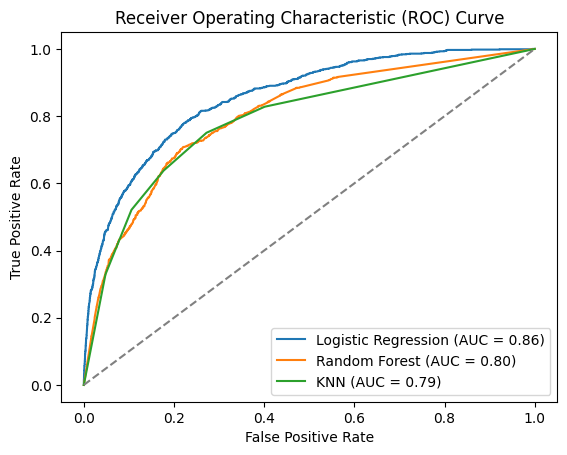

In [102]:
# Calculate and plot ROC curve for Logistic regression
fpr_lg, tpr_lg, _ = roc_curve(y_test, pipeline_model_lg.predict_proba(X_test)[:, 1], pos_label='Yes')
roc_lg = RocCurveDisplay(fpr=fpr_lg, tpr=tpr_lg)
roc_auc_lg = auc(fpr_lg, tpr_lg)
roc_lg.plot(ax=plt.gca(), name=f'Logistic Regression (AUC = {roc_auc_lg:.2f})')

# Calculate and plot ROC curve for Random forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, pipeline_model_rf.predict_proba(X_test)[:, 1], pos_label='Yes')
roc_rf = RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_rf.plot(ax=plt.gca(), name=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Calculate and plot ROC curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, pipeline_model_knn.predict_proba(X_test)[:, 1], pos_label='Yes')
roc_knn = RocCurveDisplay(fpr=fpr_knn, tpr=tpr_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_knn.plot(ax=plt.gca(), name=f'KNN (AUC = {roc_auc_knn:.2f})')

# Plot the chance level (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Customize the plot further if needed
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [103]:
print('Classification report for dummy classifier\n\n', classification_report(y_test, dummy.predict(X_test), zero_division=0.0))

Classification report for dummy classifier

               precision    recall  f1-score   support

          No       0.86      1.00      0.92      6064
         Yes       0.00      0.00      0.00       994

    accuracy                           0.86      7058
   macro avg       0.43      0.50      0.46      7058
weighted avg       0.74      0.86      0.79      7058



In [104]:
print('Classification report for Logistic regression\n\n', classification_report(y_test, pipeline_model_lg.predict(X_test),))
print("------"*10)
print('Classification report for Random Forest\n\n', classification_report(y_test, pipeline_model_rf.predict(X_test),))
print("------"*10)
print('Classification report for KNN\n\n', classification_report(y_test, pipeline_model_knn.predict(X_test),))

Classification report for Logistic regression

               precision    recall  f1-score   support

          No       0.95      0.80      0.87      6064
         Yes       0.38      0.75      0.50       994

    accuracy                           0.79      7058
   macro avg       0.66      0.77      0.68      7058
weighted avg       0.87      0.79      0.82      7058

------------------------------------------------------------
Classification report for Random Forest

               precision    recall  f1-score   support

          No       0.91      0.89      0.90      6064
         Yes       0.42      0.50      0.45       994

    accuracy                           0.83      7058
   macro avg       0.67      0.69      0.68      7058
weighted avg       0.84      0.83      0.84      7058

------------------------------------------------------------
Classification report for KNN

               precision    recall  f1-score   support

          No       0.93      0.82      0.87    

<a id='cross_validation'/>

# Cross Validation
[TOC](#toc)

In [105]:
cross_val_score(pipeline_model_lg, X_train, y_train, n_jobs=-1, cv=5)  
# -1 - use all CPUs

/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

array([0.7893139 , 0.78803523, 0.79562709, 0.78560583, 0.78590951])

In [106]:
cross_val_score(pipeline_model_rf, X_train, y_train, n_jobs=-1, cv=5)  

/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

array([0.8202793 , 0.83631947, 0.83480109, 0.83328272, 0.83814151])

<a id='grid_search'/>

In [107]:
cross_val_score(pipeline_model_knn, X_train, y_train, n_jobs=-1, cv=5)  

/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

array([0.78901032, 0.79046462, 0.79532341, 0.79896751, 0.79957486])

# Grid Search
[TOC](#toc)

In [108]:
#find the names of parameters and their current value
pipeline_model_lg.get_params()

{'memory': None,
 'steps': [('ct',
   ColumnTransformer(transformers=[('num_processor',
                                    Pipeline(steps=[('num_scaler',
                                                     StandardScaler())]),
                                    ['year', 'age']),
                                   ('cat_processor',
                                    Pipeline(steps=[('ohe', OneHotEncoder())]),
                                    ['country', 'location_type', 'cellphone',
                                     'gender', 'relationship_with_head',
                                     'education_level', 'job_type'])])),
  ('smote', SMOTE(random_state=42)),
  ('model', LogisticRegression())],
 'verbose': False,
 'ct': ColumnTransformer(transformers=[('num_processor',
                                  Pipeline(steps=[('num_scaler',
                                                   StandardScaler())]),
                                  ['year', 'age']),
                      

In [110]:
#Set the values for each parameter to check
params_dict_lg = {'model__penalty':('l1','l2'),
               'model__C': [0.001, 0.01, 0.1, 1, 10],
               'model__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
              #  'model__verbose': [1, 3, 6],
               'model__max_iter': [100, 500, 1000],
               'model__class_weight': [None, 'balanced'],
               'model__multi_class': ['ovr', 'multinomial']
              }

gridsearch_lg = GridSearchCV(
                          pipeline_model_lg, 
                          params_dict_lg, 
                          scoring='accuracy', 
                          cv=5, 
                          n_jobs=-1,
                          verbose=3
                          )
gridsearch_lg

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('num_processor',
                                                                         Pipeline(steps=[('num_scaler',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'age']),
                                                                        ('cat_processor',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder())]),
                                                                         ['country',
                                                                          'location_type',
                                                                          'cellphone',
                                                                          'gender',
                                                                          'relationship_with_head',
                                                                          'education_level',
                                                                          'job_type'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10],
                         'model__class_weight': [None, 'balanced'],
                         'model__max_iter': [100, 500, 1000],
                         'model__multi_class': ['ovr', 'multinomial'],
                         'model__penalty': ('l1', 'l2'),
                         'model__solver': ['liblinear', 'lbfgs', 'newton-cg',
                                           'sag', 'saga']},
             scoring='accuracy', verbose=3)

In [112]:
gridsearch_lg.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:34

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.613 total time=   1.6s
[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.603 total time=   1.6s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.621 total time=   1.7s
[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.630 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.3s
[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.2s
[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.623 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s
[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s
[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.0s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.0s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.1s
[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.4s
[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.4s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.603 total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.613 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.630 total time=   2.1s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.621 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.741 total time=   1.4s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.623 total time=   1.8s
[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.751 total time=   1.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.759 total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.742 total time=   1.9s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.739 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.747 total time=   2.1s
[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.757 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.767 total time=   1.5s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.751 total time=   1.4s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.745 total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.747 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.757 total time=   1.9s
[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.767 total time=   1.8s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.751 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.745 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inco

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.747 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.757 total time=   2.2s[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.766 total time=   1.9s



/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.751 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.745 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.756 total time=   2.1s
[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.747 total time=   2.2s
[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.766 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.1s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.750 total time=   1.8s
[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.744 total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.4s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.4s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.3s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.2s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s
[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.2s
[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.2s
[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.613 total time=   1.9s
[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.603 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.630 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.621 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.623 total time=   2.2s
[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.759 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.768 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.776 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.761 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.760 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.759 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.768 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.776 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.761 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.759 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.760 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.768 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.776 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.761 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.760 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.759 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.768 total time=   2.1s
[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.776 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.761 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.603 total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.760 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.613 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.630 total time=   1.8s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.621 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.623 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.2s
[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.603 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.613 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.630 total time=   2.3s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.621 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.623 total time=   2.3s
[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.741 total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.751 total time=   1.9s
[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.759 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.742 total time=   1.8s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.739 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.747 total time=   1.8s
[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.757 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.767 total time=   1.9s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.751 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.745 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.747 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.757 total time=   2.5s
[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.767 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.751 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.745 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.747 total time=   2.1s
[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.757 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.767 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.751 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.747 total time=   1.7s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.745 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.756 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.766 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.750 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.4s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.744 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s
[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.3s
[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.2s
[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s
[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.603 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.613 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.630 total time=   3.1s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.621 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.623 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.759 total time=   2.3s
[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.768 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.776 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.761 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.760 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.759 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.768 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.776 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.761 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.759 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.760 total time=   3.5s
[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.768 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.776 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.761 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.760 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.759 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.768 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.776 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.761 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.760 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.603 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.613 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.630 total time=   2.2s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.621 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.623 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s
[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s
[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.603 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.613 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.630 total time=   2.8s[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.621 total time=   2.8s



/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.741 total time=   2.1s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.623 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.751 total time=   2.0s
[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.759 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.742 total time=   1.7s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.739 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.747 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.757 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.767 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.751 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.745 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.747 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.757 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.767 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.751 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.745 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.747 total time=   2.2s
[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.757 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.767 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.751 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.745 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.747 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.756 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.766 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.750 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.744 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s
[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.603 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.613 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.630 total time=   3.0s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.621 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.623 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s
[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.759 total time=   2.3s
[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.768 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.776 total time=   2.4s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.761 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.760 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.759 total time=   4.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.768 total time=   4.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.776 total time=   4.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.761 total time=   4.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.760 total time=   3.8s
[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.759 total time=   2.8s
[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.768 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.776 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.761 total time=   2.4s
[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.760 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.759 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.768 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.776 total time=   2.9s
[CV 4/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.761 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.760 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.603 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.613 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.630 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.621 total time=   2.3s
[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.623 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s
[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s
[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s
[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s
[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s
[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s
[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s
[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.603 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.613 total time=   2.0s
[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.621 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.630 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.623 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.741 total time=   2.3s
[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.751 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.759 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.742 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.739 total time=   2.2s
[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.747 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.757 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.767 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.751 total time=   2.4s
[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.745 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.747 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.757 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.767 total time=   2.5s
[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.751 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.745 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.747 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.757 total time=   2.2s
[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.767 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.751 total time=   2.3s
[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.745 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.756 total time=   2.5s
[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.747 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.766 total time=   2.8s
[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.750 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.744 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.0s
[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.8s
[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s
[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s
[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.2s
[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.2s
[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.603 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.613 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.630 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.621 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s
[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.623 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s
[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.759 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.768 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.761 total time=   1.9s
[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.776 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.760 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.759 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.768 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.776 total time=   2.8s
[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.761 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.759 total time=   2.1s
[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.760 total time=   2.9s
[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.768 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.776 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.761 total time=   2.7s
[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.760 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.759 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.768 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.776 total time=   2.8s
[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.761 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.603 total time=   2.0s
[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.760 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.613 total time=   1.7s
[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.630 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.621 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.623 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s
[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.3s
[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s
[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s
[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.603 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.613 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.621 total time=   2.0s
[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.630 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.623 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.741 total time=   1.9s
[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.751 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.759 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.742 total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.739 total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.747 total time=   1.8s
[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.757 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.767 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.751 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.745 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.747 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.757 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.767 total time=   2.3s
[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.751 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.745 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.747 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.757 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.767 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.750 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.745 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.747 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.756 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.766 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.750 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.744 total time=   2.1s
[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.8s
[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.8s
[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.3s
[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.3s
[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s
[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s
[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.603 total time=   2.6s
[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.613 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.630 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.621 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.623 total time=   2.3s
[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.4s
[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.759 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.768 total time=   2.0s
[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.776 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.761 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.760 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.759 total time=   3.2s
[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.768 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.776 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.761 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.759 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.768 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.760 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.776 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.761 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.760 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.759 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.768 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.776 total time=   2.3s
[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.761 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.603 total time=   1.7s
[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.760 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.613 total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.630 total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inco

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.621 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.623 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s
[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s
[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s
[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.603 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.613 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.621 total time=   1.8s
[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.630 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.623 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.741 total time=   1.8s
[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.751 total time=   1.7s
[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.759 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.742 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.739 total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.757 total time=   1.7s
[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.747 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.767 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.751 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.745 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.747 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.757 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.767 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.751 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.745 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.747 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.757 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.767 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.751 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.745 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.747 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.756 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.766 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.750 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.744 total time=   2.6s
[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s
[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s
[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s
[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.603 total time=   2.4s
[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.613 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.630 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.621 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.623 total time=   2.3s
[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.759 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.768 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.776 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.761 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.760 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.759 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.768 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.776 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.761 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.759 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.760 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.768 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.776 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.761 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.760 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.759 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.768 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.776 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.761 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.772 total time=   2.6s
[CV 5/5] END model__C=0.001, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.760 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.778 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.785 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.766 total time=   2.3s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.772 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s
[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.771 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.778 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.785 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.766 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.783 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.785 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.792 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.781 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.776 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.783 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.792 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.780 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.777 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.783 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.792 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.780 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.777 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.783 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.792 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.780 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.777 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.782 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   3.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.793 total time=   3.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.780 total time=   3.5s
[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.777 total time=   3.7s
[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.3s
[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.778 total time=   2.9s
[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.785 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s
[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s
[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.766 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s
[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   2.6s
[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.8s
[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.794 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.779 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   4.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   4.3s
[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.794 total time=   4.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   4.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.779 total time=   4.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.789 total time=   3.9s
[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   4.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.794 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.779 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   4.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.789 total time=   4.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.794 total time=   4.6s
[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.772 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   4.9s
[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.778 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.779 total time=   5.5s
[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.785 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.772 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.766 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.7s
[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s
[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s
[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.3s
[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.4s
[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.778 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.785 total time=   2.4s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.783 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.766 total time=   2.3s
[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.785 total time=   2.1s
[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.792 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.781 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.776 total time=   2.4s
[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.783 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.792 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.780 total time=   2.6s
[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.777 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.783 total time=   2.8s
[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.792 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.780 total time=   2.4s
[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.777 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.783 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.792 total time=   3.1s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.780 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.777 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.782 total time=   5.2s
[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   4.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.793 total time=   5.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.3s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.780 total time=   4.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.777 total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s
[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.771 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.778 total time=   2.4s
[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.785 total time=   2.5s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.766 total time=   2.0s
[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s
[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s
[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   2.6s
[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.8s
[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.794 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.779 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   4.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   3.5s
[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.794 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.779 total time=   4.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.8s
[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.789 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.794 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.779 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   6.1s
[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.789 total time=   5.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.772 total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.794 total time=   6.1s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   5.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.778 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.785 total time=   1.8s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.772 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.779 total time=   4.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.766 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.3s
[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s
[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s
[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s
[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.778 total time=   2.2s
[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.785 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.766 total time=   2.1s
[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.783 total time=   1.7s
[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.785 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.792 total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.781 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.776 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.783 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.792 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.780 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.777 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.783 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.792 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.780 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.777 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.783 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.792 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.780 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.777 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   4.8s
[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.782 total time=   5.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.793 total time=   5.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.780 total time=   4.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.777 total time=   3.8s
[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.778 total time=   2.9s
[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.785 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.766 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s
[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s
[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.794 total time=   2.6s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.7s

/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.779 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   4.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   4.0s
[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.794 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.779 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.8s
[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.789 total time=   3.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.794 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.779 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   6.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.789 total time=   5.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.794 total time=   5.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.772 total time=   2.3s
[CV 4/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   5.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.778 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.772 total time=   1.6s
[CV 5/5] END model__C=0.01, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.779 total time=   4.5s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.785 total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.766 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s
[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s
[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.4s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.785 total time=   3.0s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.778 total time=   3.1s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.766 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.783 total time=   2.0s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.785 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.792 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.781 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.776 total time=   2.4s
[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.783 total time=   2.5s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.792 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.780 total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.777 total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.783 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.792 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.780 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.777 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.783 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.792 total time=   3.7s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.780 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.777 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.782 total time=   4.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   4.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.793 total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.780 total time=   4.0s
[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.4s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.778 total time=   3.2s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s
[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.3s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.3s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.3s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.771 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.778 total time=   3.0s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.785 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.772 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.766 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.1s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   2.7s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.794 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.779 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   4.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.794 total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   4.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.779 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.789 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.794 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.5s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.779 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   4.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.789 total time=   4.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.794 total time=   5.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   5.4s
[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.772 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.778 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.779 total time=   5.4s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.785 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.772 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.3s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.766 total time=   2.1s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.2s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.1s
[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.3s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.3s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.3s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.4s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.778 total time=   2.4s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.4s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.785 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.783 total time=   2.0s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.785 total time=   1.9s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.792 total time=   2.0s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.766 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.781 total time=   2.0s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.776 total time=   2.1s
[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.783 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.1s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.792 total time=   2.3s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.780 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.777 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.783 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   2.5s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.792 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.780 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.777 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.3s
[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.783 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.792 total time=   3.4s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.780 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.777 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.782 total time=   4.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   5.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.793 total time=   5.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.2s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.780 total time=   4.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.777 total time=   4.0s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s
[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.771 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.778 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.4s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.785 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.4s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.766 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.3s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.3s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.794 total time=   2.7s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.779 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   4.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.794 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.789 total time=   3.3s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.779 total time=   3.9s
[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.794 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.779 total time=   4.1s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   6.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.789 total time=   5.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.772 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   5.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.794 total time=   5.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.778 total time=   2.0s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.779 total time=   5.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.785 total time=   2.0s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.772 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.766 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.4s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.2s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.778 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.785 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.783 total time=   1.8s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.785 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.766 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.792 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.781 total time=   2.9s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.776 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.783 total time=   2.8s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.792 total time=   2.3s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.780 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.777 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.783 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   2.2s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.792 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.780 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.777 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.5s
[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.783 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.792 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.780 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.777 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.782 total time=   4.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   5.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.793 total time=   5.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.5s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.780 total time=   4.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.3s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.777 total time=   4.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.778 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.785 total time=   2.1s
[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.772 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.766 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s
[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.794 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.779 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   4.0s
[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.794 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.779 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.789 total time=   3.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.794 total time=   4.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.779 total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   6.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.789 total time=   5.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   5.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.794 total time=   6.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.01, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.779 total time=   6.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   6.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.792 total time=   5.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.797 total time=   8.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   5.9s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.784 total time=   6.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s
[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s
[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s
[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s
[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s
[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.792 total time=   2.9s
[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=   3.0s
[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.797 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.784 total time=   3.0s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.796 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.787 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.784 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   2.6s
[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.784 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   2.7s
[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.784 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   4.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.797 total time=   4.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.787 total time=   4.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.784 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   4.0s
[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   4.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.796 total time=   4.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.787 total time=   3.9s
[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.5s
[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s
[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.784 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s
[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s
[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s
[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s
[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.792 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=   3.9s
[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.797 total time=   4.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.784 total time=   2.3s
[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s
[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warning

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   3.5s
[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   3.2s
[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.797 total time=   3.5s
[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.785 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.797 total time=   4.5s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   4.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   5.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   4.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.785 total time=   4.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.787 total time=   4.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.789 total time=   4.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.797 total time=   5.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.787 total time=   5.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.785 total time=   5.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.787 total time=   5.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.789 total time=   5.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.797 total time=   5.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.787 total time=   5.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.785 total time=   5.2s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.792 total time=   5.0s
[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   6.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s
[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   5.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.797 total time=   6.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.784 total time=   6.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.4s
[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s
[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.792 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.797 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=   3.6s
[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.784 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   2.5s
[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.796 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inco

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.787 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.784 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.784 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   2.4s
[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.784 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   8.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   8.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.796 total time=   8.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.787 total time=   8.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.784 total time=   7.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   7.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   8.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.797 total time=  10.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.5s
[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.787 total time=   9.3s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.784 total time=   8.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s
[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s
[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s
[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.2s
[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=   3.0s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.792 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.797 total time=   3.4s
[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s
[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.784 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   3.7s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.797 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.785 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   5.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   5.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.797 total time=   5.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   5.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.785 total time=   4.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.787 total time=  10.2s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.789 total time=   9.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.797 total time=  10.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.787 total time=  10.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.785 total time=   9.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.789 total time=   9.1s
[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.787 total time=  12.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.797 total time=  12.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   5.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.792 total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.797 total time=   4.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.787 total time=  13.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.785 total time=  10.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   5.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s
[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.784 total time=   6.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s
[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.792 total time=   3.8s
[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.797 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=   3.7s
[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   2.5s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.796 total time=   2.4s
[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.784 total time=   3.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.787 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.784 total time=   2.0s
[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   2.5s
[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.784 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   2.8s
[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.784 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   7.7s
[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   7.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.796 total time=   8.3s
[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.787 total time=   7.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.784 total time=   7.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   8.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   8.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.797 total time=   9.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s
[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.8s
[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.787 total time=  11.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s
[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.784 total time=  11.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.5s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.792 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.797 total time=   5.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.4s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.784 total time=   4.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   4.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   4.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   7.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   7.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.797 total time=   7.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   7.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.785 total time=   5.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   8.0s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   7.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.797 total time=   6.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   6.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.785 total time=   5.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.789 total time=  11.5s
[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.787 total time=  12.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.797 total time=  12.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.787 total time=  12.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.785 total time=  13.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.787 total time=  15.9s
[CV 2/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.789 total time=  13.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   5.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.797 total time=  17.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.792 total time=   5.2s
[CV 5/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.785 total time=  11.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.797 total time=   5.4s
[CV 4/5] END model__C=0.1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.787 total time=  14.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.784 total time=   5.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   7.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s
[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s
[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.792 total time=   2.8s
[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=   3.3s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.797 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   2.3s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.796 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.784 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.787 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.784 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.8s
[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   2.5s
[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.784 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.784 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   4.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   4.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.797 total time=   4.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.787 total time=   4.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.784 total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   4.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   4.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.797 total time=   4.5s
[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.787 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.784 total time=   3.5s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.4s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s
[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.792 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.797 total time=   4.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.784 total time=   3.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   3.8s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.797 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   4.0s
[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.785 total time=   3.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   4.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   5.5s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.797 total time=   4.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   5.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.785 total time=   4.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.787 total time=   5.1s
[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.789 total time=   5.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.797 total time=   5.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.787 total time=   5.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.785 total time=   5.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.787 total time=   6.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.789 total time=   5.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.797 total time=   5.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.787 total time=   5.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.785 total time=   5.3s
[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   6.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.792 total time=   6.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.797 total time=   6.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   6.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.784 total time=   5.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=   3.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.792 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=   3.3s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.797 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.784 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   1.7s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.796 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.787 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.784 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.4s
[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.784 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.784 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   8.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   7.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.796 total time=   8.3s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.787 total time=   7.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.784 total time=   7.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   9.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   8.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.797 total time=  11.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.787 total time=  10.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.784 total time=   8.8s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s
[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.5s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s
[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s
[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.792 total time=   3.8s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.4s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.797 total time=   4.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.784 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   3.9s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.797 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.785 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   5.1s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.797 total time=   5.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   5.5s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   5.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.785 total time=   4.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.789 total time=   9.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.787 total time=  10.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.797 total time=  10.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.787 total time=  11.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.785 total time=  11.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.787 total time=  14.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.789 total time=  12.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.797 total time=  13.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   6.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.792 total time=   5.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.787 total time=  14.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.785 total time=  13.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.797 total time=   8.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   6.8s
[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.784 total time=   6.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s
[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s
[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s
[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.792 total time=   3.4s
[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=   3.2s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.797 total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   2.3s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.796 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.784 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.787 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.784 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.7s
[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.784 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.784 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   7.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   7.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.796 total time=   7.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.787 total time=   7.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.784 total time=   7.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   9.7s
[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   9.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.0s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.797 total time=  10.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s
[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s
[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.787 total time=  10.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s
[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.784 total time=   8.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s
[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s
[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s
[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.792 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.797 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.5s
[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.784 total time=   3.2s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=   4.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s
[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   3.6s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.797 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.787 total time=   3.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.785 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   5.2s
[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.797 total time=   5.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   5.6s
[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.787 total time=   4.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.785 total time=   4.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.789 total time=  10.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.787 total time=  10.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.797 total time=  10.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.787 total time=  11.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.785 total time=  10.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.789 total time=  10.1s
[CV 1/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.787 total time=  12.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.797 total time=  15.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.788 total time=   5.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.797 total time=   3.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.787 total time=  14.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=0.1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.785 total time=  13.1s
[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s
[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=   4.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=   6.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s
[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s
[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s
[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s
[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=   5.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/b

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.797 total time=   5.3s
[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.788 total time=   5.4s
[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=   5.3s
[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.789 total time=   2.1s
[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   2.1s
[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.796 to

/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   2.0s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=   4.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warning

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver op

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   2.5s
[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warning

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.7s
[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   3.4s
[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   3.6s
[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.789 total time=   2.6s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.796 total time=   3.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.789 total time=   2.2s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.9s
[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.796 total time=   2.3s
[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.9s
[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.9s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s
[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s
[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.4s
[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=   6.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/b

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.797 total time=   5.8s
[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.788 total time=   6.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=   5.9s
[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s
[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.3s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=   6.1s
[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warning

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warning

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.4s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   5.0s
[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   5.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   5.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   5.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.790 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   4.4s
[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.788 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.796 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.790 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.9s
[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.788 total time=   3.0s
[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   5.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.796 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.6s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   4.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.788 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.797 total time=   4.2s
[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=   5.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=   4.3s
[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s
[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s
[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s
[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.788 total time=   9.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=  11.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=  13.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.789 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.796 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.797 total time=  17.6s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=  12.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.0s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   3.3s
[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.789 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.796 total time=   3.7s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.789 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   4.8s
[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.796 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.0s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.9s
[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s
[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.8s
[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.3s
[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.3s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s
[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s
[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s
[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s
[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.788 total time=   7.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=  10.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=   9.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.797 total time=  11.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=  10.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   4.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   4.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   4.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   4.8s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   4.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   6.0s
[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   5.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   5.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   6.0s
[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.790 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   5.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.788 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.796 total time=   5.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.790 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   8.1s
[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.796 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.788 total time=   4.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   5.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.797 total time=   5.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=   5.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=   5.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.788 total time=  10.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=  14.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=  13.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.789 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.796 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   2.4s
[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.797 total time=  19.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=  12.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   3.0s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.789 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.789 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.796 total time=   4.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   5.5s
[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.796 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.1s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inco

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.0s
[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s
[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s
[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.3s
[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s
[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s
[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.788 total time=   7.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=   9.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.5s
[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=   9.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.4s
[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s
[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.797 total time=  16.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=  10.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   4.7s
[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   4.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   4.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   4.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   4.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   5.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   5.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   5.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   5.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   4.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.790 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.788 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.5s
[CV 1/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.790 total time=   2.7s
[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.796 total time=   5.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.8s
[CV 3/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.796 total time=   2.9s
[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   7.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   4.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.788 total time=   5.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.797 total time=   6.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=   6.1s
[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=   4.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s
[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s
[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s
[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s
[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s
[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=   4.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.788 total time=   4.9s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.797 total time=   4.9s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=   4.9s
[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.789 total time=   2.2s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.796 total time=   2.2s
[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=li

/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=   4.2s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   1.9s
[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warning

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warning

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   3.4s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.9s
[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.789 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.796 total time=   4.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.789 total time=   3.0s
[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   5.7s
[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.796 total time=   3.1s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.8s
[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.5s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.9s
[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s
[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s
[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s
[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=   6.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/b

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.797 total time=   6.1s
[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.788 total time=   6.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=   6.5s
[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.9s
[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s
[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=   6.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warning

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver op

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   3.3s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warning

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warning

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.7s
[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   5.7s
[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   5.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   5.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   5.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.790 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.788 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   4.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.796 total time=   5.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.790 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   5.5s
[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.796 total time=   2.5s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   4.7s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.797 total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.788 total time=   4.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=   4.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s
[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=   6.5s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s
[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.788 total time=  10.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=  14.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=  12.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.789 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.797 total time=  15.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.796 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=  12.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator ColumnTransformer from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   3.2s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.789 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   2.8s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.796 total time=   4.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.789 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   5.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.796 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   3.1s
[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.2s
[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.2s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.788 total time=   8.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=  10.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.4s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=   9.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.797 total time=  12.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=   9.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   4.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   5.1s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   5.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   5.1s
[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   5.9s
[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   6.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   4.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   6.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.790 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   4.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.788 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.790 total time=   2.7s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.796 total time=   4.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.9s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.796 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.8s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   7.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.789 total time=   6.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.797 total time=   6.8s
[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.788 total time=   7.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=   5.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s
[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=   5.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s
[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.2s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.788 total time=  10.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.789 total time=  13.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=  13.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.789 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.797 total time=  15.9s
[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.796 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   1.7s
[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.789 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.9s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=  12.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.789 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   3.2s
[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.789 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.796 total time=   3.9s
[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.789 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   5.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.0s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.796 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.9s
[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.2s
[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s
[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.4s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.2s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.788 total time=   8.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.789 total time=   9.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=   9.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.797 total time=  12.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.1s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   5.4s
[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=  11.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   5.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   5.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   4.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   5.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   5.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   5.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   5.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.790 total time=   4.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   6.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   5.5s
[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.788 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.790 total time=   2.7s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.796 total time=   5.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   7.3s
[CV 4/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.7s
[CV 3/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.796 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=1, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.788 total time=   4.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.795 total time=   5.6s
[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.785 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.790 total time=   6.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s
[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s
[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s
[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s
[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s
[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s
[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.790 total time=   6.1s
[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.788 total time=   6.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/b

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.785 total time=   5.3s
[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.795 total time=   5.4s
[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.790 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   2.0s
[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.795 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.785 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=   4.5s
[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   1.8s
[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.785 total time=   2.6s
[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   3.4s
[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.795 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.785 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.790 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.795 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.785 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   2.8s
[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.790 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.5s
[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.795 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s
[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.785 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.4s
[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.2s
[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s
[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.5s
[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.790 total time=   7.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.788 total time=   7.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.796 total time=   6.7s
[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.785 total time=   6.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=   7.8s
[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warning

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.1s
[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.4s
[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   5.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   5.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   5.7s
[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   5.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.790 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   5.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.796 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.788 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.785 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.790 total time=   2.3s
[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.796 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.785 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.788 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.785 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.790 total time=   6.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s
[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.795 total time=   4.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.3s
[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.796 total time=  15.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.788 total time=  15.9s
[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.790 total time=  16.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.785 total time=  15.8s
[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.790 total time=   2.0s
[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.795 total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.785 total time=   1.8s
[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.1s
[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.785 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.795 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.785 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.790 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.795 total time=   2.6s
[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.785 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=  18.3s
[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.790 total time=   2.6s
[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.795 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.785 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.9s
[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.3s
[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s
[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s
[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s
[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.788 total time=  20.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.796 total time=  20.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.790 total time=  21.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.785 total time=  20.8s
[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   4.0s
[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   5.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   5.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   5.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   5.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.790 total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   5.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.788 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.796 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.790 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=  28.4s
[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.796 total time=   2.4s
[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.785 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.790 total time=   4.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=   2.0s
[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.795 total time=   5.7s
[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.788 total time=   6.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.2s
[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s
[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.796 total time=  28.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.788 total time=  29.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/b

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.785 total time=  29.4s
[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.790 total time=  30.3s
[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.790 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.795 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.785 total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.785 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.795 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.785 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.790 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   2.5s
[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.796 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.785 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.790 total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.795 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.785 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=  35.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.796 total time=  39.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.788 total time=  40.3s
[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.790 total time=  43.8s
[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.785 total time=  41.1s
[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   5.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   5.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   6.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   6.8s
[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.790 total time=   4.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   5.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.796 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.788 total time=   3.3s
[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.785 total time=   4.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.790 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   4.0s
[CV 2/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.796 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.785 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.788 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.795 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.790 total time=   6.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.785 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.3s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=   4.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.5s
[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.8s
[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.4s
[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.4s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.790 total time=   5.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/b

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.788 total time=   5.5s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.795 total time=   5.5s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.790 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   2.6s
[CV 5/5] END model__C=10, model__class_weight=None, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=  58.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.785 total time=   6.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=   6.7s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.795 total time=   2.9s
[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.785 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   2.2s
[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.785 total time=   2.4s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.795 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.785 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   3.2s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.790 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.795 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.785 total time=   2.9s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.790 total time=   2.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.4s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.2s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.795 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.785 total time=   3.3s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.4s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.3s
[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.7s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s
[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.790 total time=   7.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/b

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.796 total time=   7.1s
[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.785 total time=   7.1s
[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.788 total time=   7.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.1s
[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.3s
[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=   6.2s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warning

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.7s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   5.6s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   5.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   5.0s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   5.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.790 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.788 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   5.1s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.796 total time=   3.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.788 total time=   3.1s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.790 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   4.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.796 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.785 total time=   3.3s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=100, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.788 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.785 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.795 total time=   5.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.790 total time=   9.4s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.6s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=  10.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s
[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.796 total time=  15.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/b

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.790 total time=  16.9s
[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.788 total time=  16.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.785 total time=  16.5s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.790 total time=   2.5s
[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.795 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.785 total time=   2.1s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.0s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.785 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.795 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.785 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.790 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.795 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=  19.4s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.790 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.795 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.785 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.4s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.1s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s
[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s
[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.796 total time=  21.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.788 total time=  22.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.790 total time=  23.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.785 total time=  22.9s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   3.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   4.0s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   6.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   6.7s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   6.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   6.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.790 total time=   4.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   5.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.788 total time=   4.7s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.796 total time=   3.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.785 total time=   4.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.790 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=  30.9s
[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.788 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.796 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.785 total time=   2.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=500, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.788 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.790 total time=   5.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.786 total time=   4.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s
[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.785 total time=   8.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=liblinear;, score=0.795 total time=  10.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.2s
[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.796 total time=  29.2s
[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.788 total time=  29.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.790 total time=  32.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.785 total time=  31.0s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.790 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.788 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.795 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.785 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=liblinear;, score=0.786 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.785 total time=   2.3s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   2.2s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.795 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.785 total time=   2.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   2.2s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.790 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.788 total time=   2.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.796 total time=   2.4s
[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.785 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=sag;, score=0.786 total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.790 total time=   1.8s
[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.788 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.795 total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.785 total time=   2.0s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=liblinear;, score=nan total time=   1.7s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=lbfgs;, score=nan total time=   1.6s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=newton-cg;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   1.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=sag;, score=nan total time=   2.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=ovr, model__penalty=l1, model__solver=saga;, score=0.786 total time=  36.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.788 total time=  40.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.796 total time=  39.6s
[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   1.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.790 total time=  46.0s
[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.785 total time=  44.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   3.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=liblinear;, score=nan total time=   2.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.790 total time=   3.7s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.788 total time=   4.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.796 total time=   3.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.8s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=lbfgs;, score=0.786 total time=   3.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.790 total time=   6.3s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.788 total time=   6.3s
[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.796 total time=   6.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.790 total time=   4.2s
[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   5.9s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=newton-cg;, score=0.786 total time=   5.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.796 total time=   4.2s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.788 total time=   4.8s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.785 total time=   4.5s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 1/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.790 total time=   3.1s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=sag;, score=0.786 total time=   4.6s
[CV 2/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.788 total time=   3.0s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

[CV 3/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.796 total time=   2.4s
[CV 4/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.785 total time=   2.4s
[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l2, model__solver=saga;, score=0.786 total time=   2.4s


/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END model__C=10, model__class_weight=balanced, model__max_iter=1000, model__multi_class=multinomial, model__penalty=l1, model__solver=saga;, score=0.786 total time=  49.0s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('num_processor',
                                                                         Pipeline(steps=[('num_scaler',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'age']),
                                                                        ('cat_processor',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder())]),
                                                                         ['country',
                                                                          'location_type',
                                                                          'cellphone',
                                                                          'gender',
                                                                          'relationship_with_head',
                                                                          'education_level',
                                                                          'job_type'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10],
                         'model__class_weight': [None, 'balanced'],
                         'model__max_iter': [100, 500, 1000],
                         'model__multi_class': ['ovr', 'multinomial'],
                         'model__penalty': ('l1', 'l2'),
                         'model__solver': ['liblinear', 'lbfgs', 'newton-cg',
                                           'sag', 'saga']},
             scoring='accuracy', verbose=3)

In [119]:
best_hyperparameters_lg = gridsearch_lg.best_params_
best_hyperparameters_lg

{'model__C': 0.1,
 'model__class_weight': None,
 'model__max_iter': 100,
 'model__multi_class': 'ovr',
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

In [120]:
# Refit the model with best hyperparameters
best_lg = gridsearch_lg.best_estimator_
best_lg.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('num_scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'age']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['country', 'location_type',
                                                   'cellphone', 'gender',
                                                   'relationship_with_head',
                                                   'education_level',
                                                   'job_type'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 LogisticRegression(C=0.1, multi_class='ovr', penalty='l1',
                                    solver='liblinear'))])

In [121]:
cross_val_score(best_lg, X_train, y_train, cv=5, scoring='accuracy')  
# -1 - use all CPUs

array([0.78870674, 0.79046462, 0.79714546, 0.78742788, 0.78499848])

<a id='comparison'>

#### Comparison
[TOC](#toc)

In [125]:
# Evaluate on the test set
test_accuracy = best_lg.score(X_test, y_test)
test_accuracy

0.7896004533862284

In [126]:
# Inspect model performance
y_pred_lg_best = best_lg.predict(X_test)

# Additional metrics
print("Before tuning")
print(classification_report(y_test, y_pred_lg))
print("------"*10)
print("After tuning")
print(classification_report(y_test, y_pred_lg_best))

Before tuning
              precision    recall  f1-score   support

          No       0.95      0.80      0.87      6064
         Yes       0.38      0.75      0.50       994

    accuracy                           0.79      7058
   macro avg       0.66      0.77      0.68      7058
weighted avg       0.87      0.79      0.82      7058

------------------------------------------------------------
After tuning
              precision    recall  f1-score   support

          No       0.95      0.80      0.87      6064
         Yes       0.38      0.75      0.50       994

    accuracy                           0.79      7058
   macro avg       0.66      0.77      0.68      7058
weighted avg       0.87      0.79      0.82      7058



In [127]:
# Assuming 'model_before_tuning' is your initial model
#y_pred_lg = pipeline_model_lg.predict(X_test)

# Evaluate performance metrics
# Other metrics, e.g., precision, recall, f1-score
print("Accuracy:", accuracy_score(y_test, y_pred_lg))
print("Recall:", recall_score(y_test, y_pred_lg, pos_label='Yes'))
print("precision", precision_score(y_test, y_pred_lg, pos_label='Yes'))
print("-----"*10)

print("Accuracy:", accuracy_score(y_test, y_pred_lg_best))
print("Recall:", recall_score(y_test, y_pred_lg_best, pos_label='Yes'))
print("precision", precision_score(y_test, y_pred_lg_best, pos_label='Yes'))
print("-----"*10)
# Confusion matrix


Accuracy: 0.7904505525644658
Recall: 0.7515090543259557
precision 0.3774633653360283
--------------------------------------------------
Accuracy: 0.7896004533862284
Recall: 0.7535211267605634
precision 0.3765711412770236
--------------------------------------------------


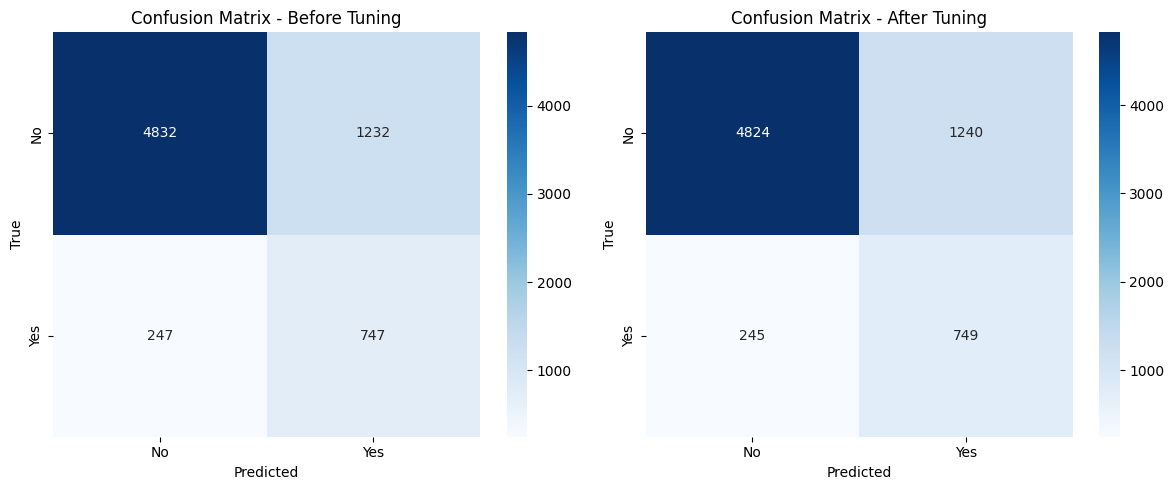

In [128]:
# Confusion matrix
cm_before_tuning = confusion_matrix(y_test, y_pred_lg)
cm_after_tuning = confusion_matrix(y_test, y_pred_lg_best)

# Plotting
plt.figure(figsize=(12, 5)) 

plt.subplot(1, 2, 1)
# Plot confusion matrix before tuning
sns.heatmap(cm_before_tuning, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Before Tuning')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
# Plot confusion matrix after tuning
sns.heatmap(cm_after_tuning, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - After Tuning')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

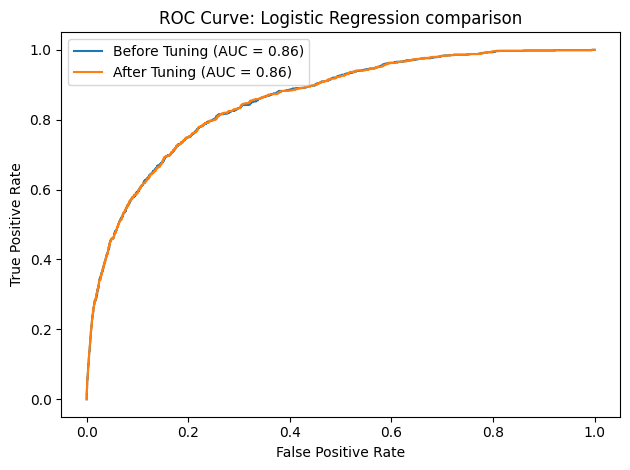

In [131]:
# ROC curve
fpr_lg_before, tpr_lg_before, _ = roc_curve(y_test, pipeline_model_lg.predict_proba(X_test)[:, 1], pos_label='Yes')
roc_lg_before = RocCurveDisplay(fpr=fpr_lg_before, tpr=tpr_lg_before)
roc_auc_lg_before = auc(fpr_lg_before, tpr_lg_before)
roc_lg_before.plot(ax=plt.gca(), name=f'Before Tuning (AUC = {roc_auc_lg_before:.2f})')

fpr_lg_after, tpr_lg_after, _ = roc_curve(y_test, best_lg.predict_proba(X_test)[:, 1], pos_label='Yes')
roc_lg_after = RocCurveDisplay(fpr=fpr_lg_after, tpr=tpr_lg_after)
roc_auc_lg_after = auc(fpr_lg_after, tpr_lg_after)
roc_lg_after.plot(ax=plt.gca(), name=f'After Tuning (AUC = {roc_auc_lg_after:.2f})')

# Plot ROC curves
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression comparison')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
gridsearch_lg.best_estimator_.predict(X_test)

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
#Score (accuracy) the test data set
gridsearch.best_estimator_.score(X_test, y_test)

0.8856616605270615

In [ ]:
# print errors
try:
    gridsearch.fit(X_train, y_train)
except Exception as e:
    print(e)


12450.00s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12450.07s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12450.12s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
12450.17s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.01s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01

Invalid parameter 'ohe' for estimator Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('num_scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'age']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['country', 'location_type',
                                                   'cellphone', 'gender',
                                                   'relationship_with_head',
                                                   'education_level',
                                                   'job_type'])])),
                ('model', LogisticRegre

In [117]:
pipeline_model_rf.get_params()

{'memory': None,
 'steps': [('ct',
   ColumnTransformer(transformers=[('num_processor',
                                    Pipeline(steps=[('num_scaler',
                                                     StandardScaler())]),
                                    ['year', 'age']),
                                   ('cat_processor',
                                    Pipeline(steps=[('ohe', OneHotEncoder())]),
                                    ['country', 'location_type', 'cellphone',
                                     'gender', 'relationship_with_head',
                                     'education_level', 'job_type'])])),
  ('model', RandomForestClassifier())],
 'verbose': False,
 'ct': ColumnTransformer(transformers=[('num_processor',
                                  Pipeline(steps=[('num_scaler',
                                                   StandardScaler())]),
                                  ['year', 'age']),
                                 ('cat_processor',
    

In [118]:
#Set the values for each parameter to check
params_dict_rf = {'model__penalty':('l1','l2'),
              'model__verbose': [3, 7]}

gridsearch = GridSearchCV(
                          pipeline_model_rf, 
                          params_dict, 
                          scoring='accuracy', 
                          cv=5, 
                          n_jobs=-1
                          )
gridsearch

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('num_processor',
                                                                         Pipeline(steps=[('num_scaler',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'age']),
                                                                        ('cat_processor',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder())]),
                                                                         ['country',
                                                                          'location_type',
                                                                          'cellphone',
                                                                          'gender',
                                                                          'relationship_with_head',
                                                                          'education_level',
                                                                          'job_type'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_iter': [100, 500, 1000],
                         'model__penalty': ('l1', 'l2'),
                         'model__verbose': [1, 3, 6]},
             scoring='accuracy')

In [119]:
best_hyperparameters = gridsearch.best_params_
best_hyperparameters

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
gridsearch.best_estimator_.predict(X_test)

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
#Score (accuracy) the test data set
gridsearch.best_estimator_.score(X_test, y_test)

0.8856616605270615

<a id='eda_yes'>

# EDA for Yes case
[TOC](#toc)

In [ ]:
target = pd.read_csv('Train.csv')
target.head(2).T

0                     1
country                                   Kenya                 Kenya
year                                       2018                  2018
uniqueid                             uniqueid_1            uniqueid_2
bank_account                                Yes                    No
location_type                             Rural                 Rural
cellphone_access                            Yes                    No
household_size                                3                     5
age_of_respondent                            24                    70
gender_of_respondent                     Female                Female
relationship_with_head                   Spouse     Head of Household
marital_status          Married/Living together               Widowed
education_level             Secondary education   No formal education
job_type                          Self employed  Government Dependent

In [ ]:
target = target.drop('uniqueid', axis=1).head()


In [ ]:
target.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [ ]:
# Separate data into "Yes" and "No" groups
yes_group = target[target['bank_account'] == 'Yes']
no_group = target[target['bank_account'] == 'No']

In [ ]:
yes_group.head(2)

country  year bank_account location_type cellphone_access  household_size   
0   Kenya  2018          Yes         Rural              Yes               3  \
2   Kenya  2018          Yes         Urban              Yes               5   

   age_of_respondent gender_of_respondent relationship_with_head   
0                 24               Female                 Spouse  \
2                 26                 Male         Other relative   

            marital_status                  education_level       job_type  
0  Married/Living together              Secondary education  Self employed  
2     Single/Never Married  Vocational/Specialised training  Self employed

In [ ]:
df.groupby('bank_account')


In [ ]:
total = len(df['bank_account'])
for p in ax.ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 20
    ax.ax.text(x, y, percentage, ha='center', va='bottom', fontsize=12, color='black')

cross_tab = pd.crosstab(df['bank_account'], df['location_type'], normalize='columns') * 100
cross_tab['All'] = cross_tab.sum(axis=1)
cross_tab.loc['All'] = cross_tab.sum()
print(cross_tab)

NameError: name 'ax' is not defined

<a id='feature_engineering'/>

# Feature engineering
[TOC](#toc)

In [ ]:
le = LabelEncoder()
variables_to_encode = ['country', 'year', 'bank_account', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status',  'education_level', 'job_type']
for variable in variables_to_encode:
    df_bak[variable] = le.fit_transform(df_bak[variable])

In [ ]:
df_bak.head()

country  year    uniqueid  bank_account  location_type  cellphone_access   
0        0     2  uniqueid_1             1              0                 1  \
1        0     2  uniqueid_2             0              0                 0   
2        0     2  uniqueid_3             1              1                 1   
3        0     2  uniqueid_4             0              0                 1   
4        0     2  uniqueid_5             0              1                 0   

   household_size  age_of_respondent  gender_of_respondent   
0               3                 24                     0  \
1               5                 70                     0   
2               5                 26                     1   
3               5                 34                     0   
4               8                 26                     1   

   relationship_with_head  marital_status  education_level  job_type  
0                       5               2                3         9  
1                       1               4                0         4  
2                       3               3                5         9  
3                       1               2                2         3  
4                       0               3                2         5

In [ ]:
df_bak.drop('uniqueid', inplace=True, axis=1) 

In [ ]:
df_bak.corr().round(2)

country  year  bank_account  location_type   
country                    1.00 -0.09         -0.16           0.15  \
year                      -0.09  1.00          0.11           0.21   
bank_account              -0.16  0.11          1.00           0.09   
location_type              0.15  0.21          0.09           1.00   
cellphone_access          -0.15 -0.07          0.21          -0.09   
age_of_respondent         -0.06 -0.02          0.02          -0.05   
gender_of_respondent      -0.03  0.00          0.12           0.01   
relationship_with_head     0.13  0.00         -0.07           0.02   
education_level           -0.05  0.17          0.32           0.13   
job_type                   0.38  0.27         -0.06           0.37   

                        cellphone_access  age_of_respondent   
country                            -0.15              -0.06  \
year                               -0.07              -0.02   
bank_account                        0.21               0.02   
location_type                      -0.09              -0.05   
cellphone_access                    1.00              -0.10   
age_of_respondent                  -0.10               1.00   
gender_of_respondent                0.10               0.01   
relationship_with_head             -0.05              -0.15   
education_level                     0.25              -0.35   
job_type                           -0.15              -0.10   

                        gender_of_respondent  relationship_with_head   
country                                -0.03                    0.13  \
year                                    0.00                    0.00   
bank_account                            0.12                   -0.07   
location_type                           0.01                    0.02   
cellphone_access                        0.10                   -0.05   
age_of_respondent                       0.01                   -0.15   
gender_of_respondent                    1.00                   -0.47   
relationship_with_head                 -0.47                    1.00   
education_level                         0.12                   -0.02   
job_type                               -0.03                    0.04   

                        education_level  job_type  
country                           -0.05      0.38  
year                               0.17      0.27  
bank_account                       0.32     -0.06  
location_type                      0.13      0.37  
cellphone_access                   0.25     -0.15  
age_of_respondent                 -0.35     -0.10  
gender_of_respondent               0.12     -0.03  
relationship_with_head            -0.02      0.04  
education_level                    1.00      0.04  
job_type                           0.04      1.00

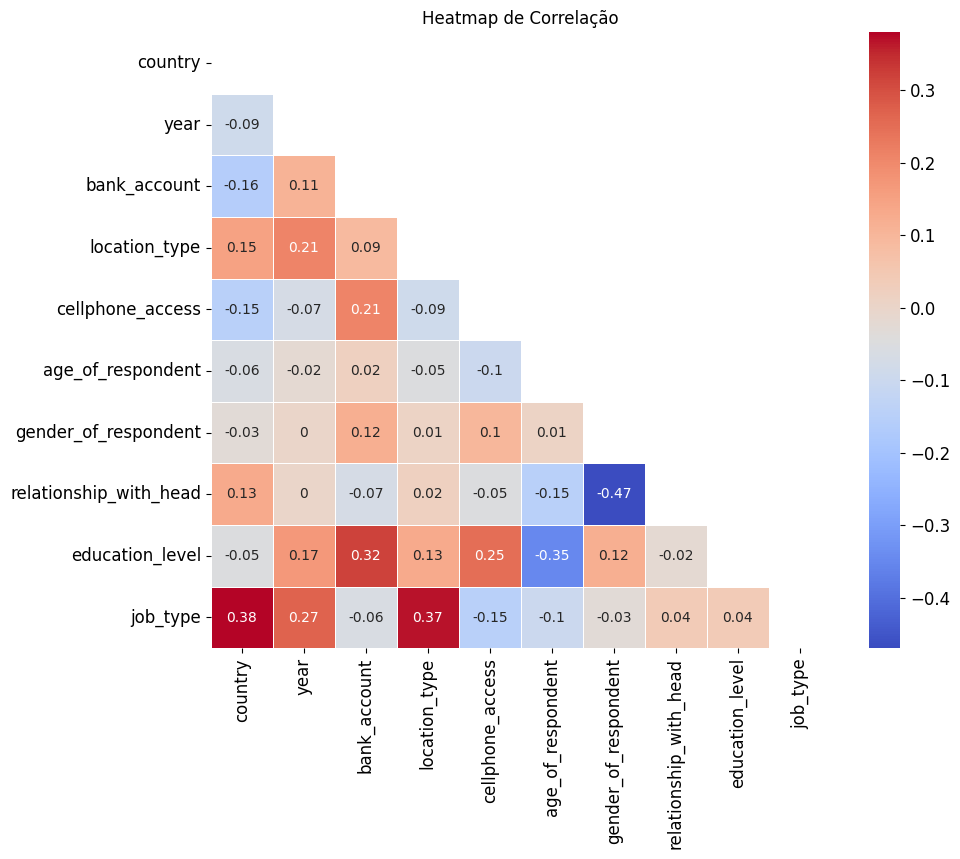

In [ ]:
# Select the columns you want to include in the heatmap
cols = ['job_type', 'bank_account']

# Create a correlation matrix between the selected columns
correlation_matrix = df_bak.corr().round(2)

# Create a mask to hide the upper triangular portion of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the heatmap size
plt.figure(figsize=(10, 8))

# Create the heatmap with colors
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, mask=mask)

# Define the heatmap title
plt.title('Heatmap de Correlação')

# Display the heatmap
plt.show()


In [ ]:
df_bak.drop(['household_size', 'marital_status'], inplace=True, axis=1) 

In [ ]:
df_bak.head()

country  year  bank_account  location_type  cellphone_access   
0        0     2             1              0                 1  \
1        0     2             0              0                 0   
2        0     2             1              1                 1   
3        0     2             0              0                 1   
4        0     2             0              1                 0   

   age_of_respondent  gender_of_respondent  relationship_with_head   
0                 24                     0                       5  \
1                 70                     0                       1   
2                 26                     1                       3   
3                 34                     0                       1   
4                 26                     1                       0   

   education_level  job_type  
0                3         9  
1                0         4  
2                5         9  
3                2         3  
4                2         5

In [ ]:
df_bak.shape

(23524, 10)

# Hypothesis

#### Most peolple that don't have bank account are from rural area.
#### Peolple with cell phones have no bank account
#### Peolple with high education have more access to bank account
#### Profile from bank accounter

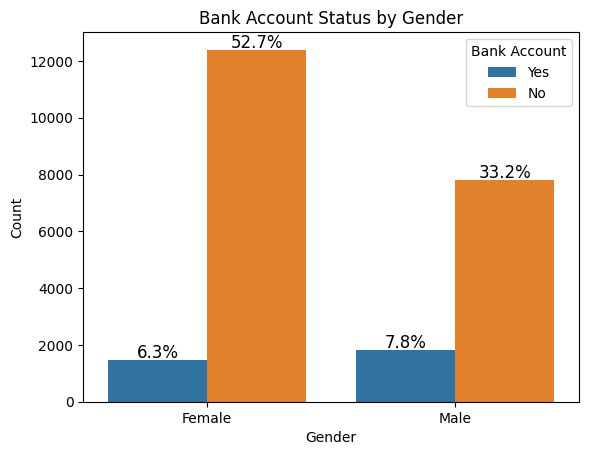

In [ ]:
ax = sns.countplot(x='gender_of_respondent', hue='bank_account', data=df)
# Add percentages inside the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
# Customize the plot
plt.title("Bank Account Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Bank Account', labels=['Yes', 'No'])
# Show the plot
plt.show()

In [ ]:
df.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone', 'age',
       'gender', 'relationship_with_head', 'education_level', 'job_type'],
      dtype='object')

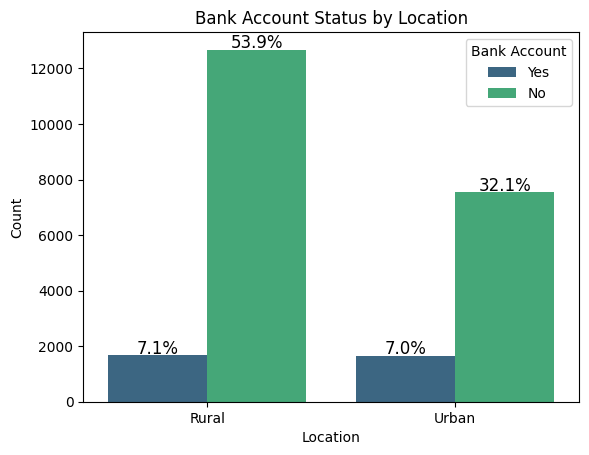

In [ ]:
# Define a custom color palette
#custom_palette = {"Yes": "b", "No": "g"}

ax = sns.countplot(x='location_type', hue='bank_account', data=df, palette="viridis")

# Add percentages inside the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
# Customize the plot
plt.title("Bank Account Status by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(title='Bank Account', labels=['Yes', 'No'])


# Show the plot
plt.show()

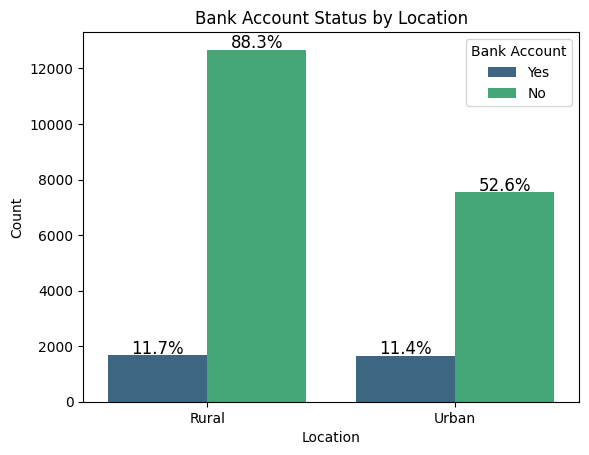

In [ ]:
# Create the countplot
ax = sns.countplot(x='location_type', hue='bank_account', data=df, palette="viridis")

# Customize the plot
plt.title("Bank Account Status by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(title='Bank Account', labels=['Yes', 'No'])

# Calculate the total counts for each location
total_counts = df['location_type'].value_counts()

# Add percentages inside the bars
for p in ax.patches:
    height = p.get_height()
    location = p.get_x()
    if p.get_x() == location:
        total_count = total_counts[0]
    else:
        total_count = total_counts[1]
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', (location + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()


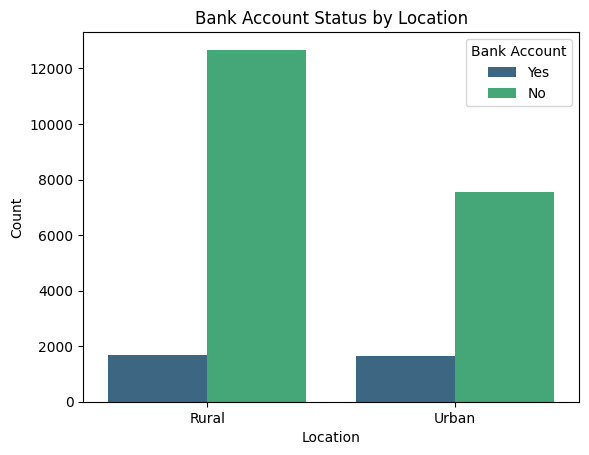

AttributeError: 'Rectangle' object has no attribute 'get_hue'

<Figure size 800x600 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
ax = sns.countplot(x='location_type', hue='bank_account', data=df, palette="viridis")

# Customize the plot
plt.title("Bank Account Status by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(title='Bank Account', labels=['Yes', 'No'])

# Calculate the total counts for each location
total_counts = df['location_type'].value_counts()

# Show the plot
plt.show()

# Create a new plot for displaying percentages
plt.figure(figsize=(8, 6))
for p in ax.patches:
    height = p.get_height()
    location = p.get_x()
    hue = p.get_hue()
    percentage = (height / total_counts[total_counts.index == location].values[0]) * 100
    plt.text(location + p.get_width() / 2., height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12, color='black')

# Customize the percentage plot
plt.title("Percentage of Bank Account Status by Location")
plt.xlabel("Location")
plt.ylabel("Percentage")

# Show the percentage plot
plt.show()


<Figure size 800x600 with 0 Axes>

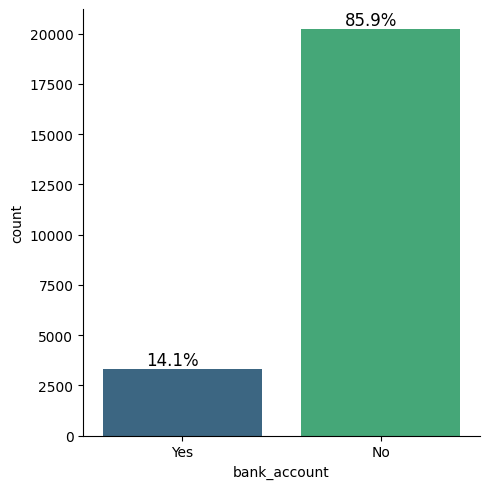

In [ ]:
# Create the catplot with palette viridis
plt.figure(figsize=(8, 6))
ax = sns.catplot(x="bank_account", kind="count", data=df, palette="viridis")
# Change the labels
df['bank_account'] = df['bank_account'].replace({0: 'Não', 1: 'Sim'})
# Add the percentual
total = len(df['bank_account'])
for p in ax.ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 20
    ax.ax.text(x, y, percentage, ha='center', va='bottom', fontsize=12, color='black')
# Show the graph
plt.show()# Create the catplot with palette viridis

# Feature engineering

1. Treat missing values    
Drop samples, drop the feature, impute them (mean/median/mode, draw numbers from the same distribution, conditional values - kNN k-nearest neighbors im feature space) 
2. Decide with features to use    
We dropped the features 'uniqueID', 'household_size', 'marital_status' based on the correlation analysis.
3. Decide on a model     
Logistic Regression, kNN Classifier,  (take the majority value of the k nearest neighbors)
4. Treat the features accordingly     
`Pclass` - OHE (one-hot-encode)    
`Name` - drop (length, extract title, ...)    
`Sex` - OHE     
`Age` - SimpleImputer/kNNImputer, kBinDiscretizer (automatically OHE)  [maybe PolynomialFeature]         
`Ticket` - KBinDiscretizer (OHE) - be aware of turn it into numbers first!!      
`Fare` - MinMaxScaler    
`Cabin` - drop (take the first letter which is the deck, impute U - unkown for missing values)   
`Embarked` - SimpleImpute with mode (maybe drop)   
`Family` - sum SibSp + ParCh + 1 (number of family members on board incl. yourself)    
    - `SibSp` - KBinDiscretizer (OHE probably not ideal because it would not cover unseen numbers)    
    - `ParCh` - KBinDiscretizer (OHE probably not ideal because it would not cover unseen numbers)

# Dumming the features

# Spliting the data and balancing the data

In [ ]:
!pip install -U imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 1.7 MB/s eta 0:00:0000:0100:01


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

SyntaxError: invalid syntax (4041038503.py, line 2)

In [ ]:
# select the target
X = df_bak.drop('bank_account', axis=1)
y = df_bak['bank_account']

# spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y_train.value_counts().sort_index()

bank_account
0    16149
1     2670
Name: count, dtype: int64

In [ ]:
# Technique SMOTE (Synthetic Minority Over-sampling Technique ) to oversample the minority class
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
#y_resampled.value_counts().sort_index()

bank_account
0    16149
1    16149
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
variables_to_encode = ['country', 'year', 'bank_account', 'location_type', 'cellphone_access', 'gender_of_respondent', 'education_level', 'job_type']
for variable in variables_to_encode:
    df_bak[variable] = le.fit_transform(df_bak[variable])

In [ ]:
X_resampled2, y_resampled2 = oversampler.fit_resample(X,y)

In [ ]:
y_resampled2.value_counts().sort_index()

bank_account
0    20212
1    20212
Name: count, dtype: int64

# Running the model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_resampled2, y_resampled2)

KNeighborsClassifier(metric='euclidean')

In [ ]:
# Knn Prediction

y_pred = knn.predict(X_test)

# Print accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("-----"*10)

# Print confusion matrix
#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn');

Accuracy: 0.8969181721572795
Recall: 0.8364485981308412
--------------------------------------------------


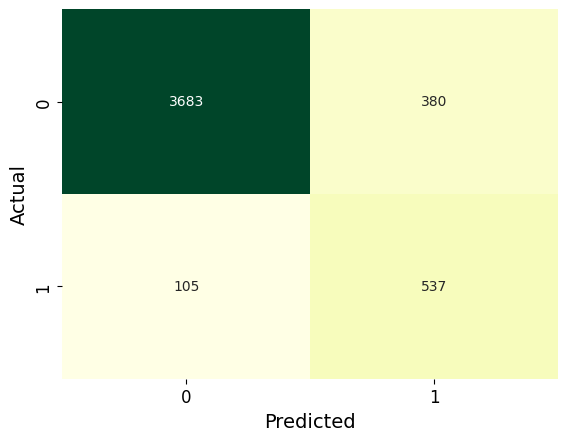

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... (seu código para treinar o modelo e fazer previsões)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Configurar a plotagem para evitar notação científica
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Plotar a matriz de confusão com rótulos formatados
sns.heatmap(cm, annot=True, fmt='g', cmap='YlGn', cbar=False)

# Adicionar rótulos
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.7385759829968119
Recall: 0.7663551401869159


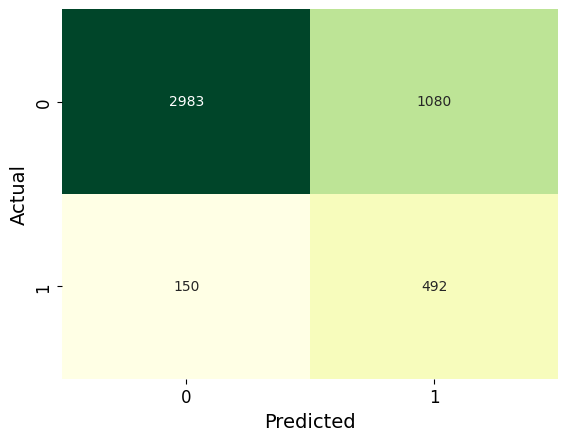

In [ ]:
# Logistic regression prediction

logistic_regression = LogisticRegression()
logistic_regression.fit(X_resampled2, y_resampled2)
y_pred = logistic_regression.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn');

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Configurar a plotagem para evitar notação científica
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Plotar a matriz de confusão com rótulos formatados
sns.heatmap(cm, annot=True, fmt='g', cmap='YlGn', cbar=False)

# Adicionar rótulos
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix\nAccuracy: 0.71')

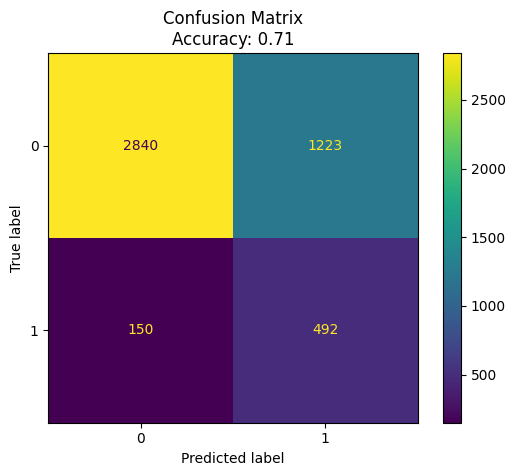

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')

In [ ]:
# Random forest prediction

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Criando uma instância do classificador RandomForest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo no conjunto de treinamento
rf_classifier.fit(X_resampled2, y_resampled2)

# Fazendo previsões no conjunto de teste
y_pred = rf_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Accuracy: 0.8994686503719448
Recall: 0.956386292834891


Text(0.5, 1.0, 'Confusion Matrix\nAccuracy: 0.90')

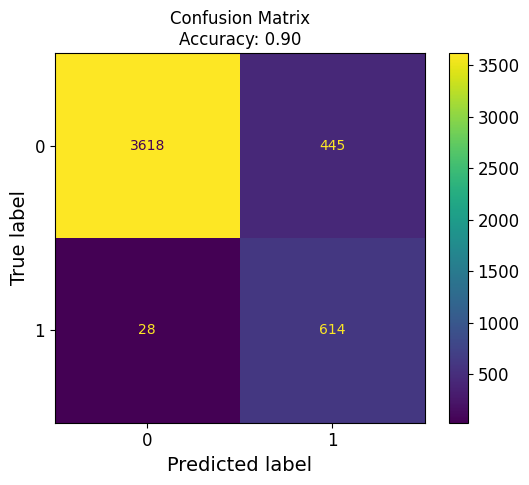

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')